In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Proyecto Integrador *Biogenesys* 

## Primer Avance 
Carga y transformacion de datos

### *Punto 3*
Lee el archivo data_latinoamerica.csv con código Python en tu Visual Studio Code.

In [31]:
#Leemos el archivo data_latinoamerica
df = pd.read_csv('data_latinoamerica.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12216057 entries, 0 to 12216056
Data columns (total 50 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   location_key                           object 
 1   date                                   object 
 2   country_code                           object 
 3   country_name                           object 
 4   new_confirmed                          float64
 5   new_deceased                           float64
 6   cumulative_confirmed                   float64
 7   cumulative_deceased                    float64
 8   cumulative_vaccine_doses_administered  float64
 9   population                             float64
 10  population_male                        float64
 11  population_female                      float64
 12  population_rural                       float64
 13  population_urban                       float64
 14  population_density                     float64
 

### *Punto 4*
Comprueba que el dataset cargado tiene la cantidad de registros y columnas especificadas (Recuerda que hay una función para ello).

In [32]:
# Verificamos la cantidad de filas y columnas
df.shape

(12216057, 50)

### *Punto 5*
Selecciona los países donde se expandirán: Colombia, Argentina, Chile, México, Perú y Brasil.

In [33]:
# Printeamos los nombres de los paises, para poder filtrar posteriormente
print(df['country_name'].unique())


['Argentina' 'Bolivia' 'Brazil' 'Chile' 'Colombia' 'Costa Rica' 'Cuba'
 'Dominican Republic' 'Ecuador' 'Guatemala' 'Honduras' 'Mexico'
 'Nicaragua' 'Panama' 'Peru' 'Puerto Rico' 'Paraguay' 'El Salvador'
 'Uruguay' 'Venezuela']


In [34]:
# Filtramos por los paises buscados

#Primero creamos una lista de los paises:
paises = ['Colombia', 'Argentina', 'Chile', 'Mexico', 'Peru', 'Brazil']

#Ahora utilizamos la funcion isin para filtrar los paises de la lista en el df
df = df[df['country_name'].isin(paises)]


### *Punto 6*
Filtra los datos en fechas mayores a 2021-01-01.

In [35]:
# Filtramos por la fecha solicitada (mayores a 2021-01-01)

#Utilizamos la funcion to_datetime
df['date'] = pd.to_datetime( df['date'])

#Filtramos por la fecha indicada
df = df[ df['date'] > '2021-01-01']

### *Punto 7*
Compara a nivel de Pais para llenar valores faltantes.

In [36]:
# Rellenamos los valores faltantes con el promedio del pais

#Creamos una funcion for para iterar cada fila
for col in df.columns:
    if df[col].isna().sum() > 0 and col != 'country_name': #con if evaluamos si la columna esta vacia exceptuando en la columna de paises.
        df[col] = df.groupby('country_name') [col].transform(lambda x: x.fillna(x.mean())) #en caso de que este vacio, rellenamos con el promedio agrupado por pais.

In [37]:
# Filtramos por Location Key
df = df[df['location_key'].isin(['AR','CL','CO','MX','BR','PE'])]
df.head(10)

location_key       date country_code country_name  new_confirmed  \
367           AR 2021-01-02           AR    Argentina         7767.0   
368           AR 2021-01-03           AR    Argentina         4934.0   
369           AR 2021-01-04           AR    Argentina        13953.0   
370           AR 2021-01-05           AR    Argentina        14085.0   
371           AR 2021-01-06           AR    Argentina        14496.0   
372           AR 2021-01-07           AR    Argentina        13722.0   
373           AR 2021-01-08           AR    Argentina        13932.0   
374           AR 2021-01-09           AR    Argentina         9959.0   
375           AR 2021-01-10           AR    Argentina         5174.0   
376           AR 2021-01-11           AR    Argentina        13076.0   

     new_deceased  cumulative_confirmed  cumulative_deceased  \
367         166.0             1670634.0              46688.0   
368         157.0             1675568.0              46845.0   
369         157.0             1689521.0              47002.0   
370         160.0             1703606.0              47162.0   
371         131.0             1718102.0              47293.0   
372         160.0             1731824.0              47453.0   
373         162.0             1745756.0              47615.0   
374         158.0             1755715.0              47773.0   
375         165.0             1760889.0              47938.0   
376         170.0             1773965.0              48108.0   

     cumulative_vaccine_doses_administered  population  ...  \
367                                20334.0  44938712.0  ...   
368                                20529.0  44938712.0  ...   
369                                25164.0  44938712.0  ...   
370                                29852.0  44938712.0  ...   
371                                34162.0  44938712.0  ...   
372                                42092.0  44938712.0  ...   
373                                54090.0  44938712.0  ...   
374                                58552.0  44938712.0  ...   
375                                59043.0  44938712.0  ...   
376                                67496.0  44938712.0  ...   

     population_largest_city  area_rural_sq_km  area_urban_sq_km  \
367               15057273.0         2690269.0           55032.0   
368               15057273.0         2690269.0           55032.0   
369               15057273.0         2690269.0           55032.0   
370               15057273.0         2690269.0           55032.0   
371               15057273.0         2690269.0           55032.0   
372               15057273.0         2690269.0           55032.0   
373               15057273.0         2690269.0           55032.0   
374               15057273.0         2690269.0           55032.0   
375               15057273.0         2690269.0           55032.0   
376               15057273.0         2690269.0           55032.0   

     life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
367            76.52                    147.086                       79.483   
368            76.52                    147.086                       79.483   
369            76.52                    147.086                       79.483   
370            76.52                    147.086                       79.483   
371            76.52                    147.086                       79.483   
372            76.52                    147.086                       79.483   
373            76.52                    147.086                       79.483   
374            76.52                    147.086                       79.483   
375            76.52                    147.086                       79.483   
376            76.52                    147.086                       79.483   

     pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
367                      26.6                        15.8            NaN   
368                      26.6 

### *Punto 8*
Realiza una limpieza preliminar de los datos, eliminando registros nulos y corrigiendo los tipos de datos donde sea necesario, trata con valores medios, valores anteriores o valores siguientes.

In [38]:
# Vamos a analizar que columnas tiene valores nulos
df.isna().sum().sort_values(ascending=False)


cumulative_recovered                     2496
new_recovered                            1872
maximum_temperature_celsius                 0
latitude                                    0
longitude                                   0
area_sq_km                                  0
smoking_prevalence                          0
diabetes_prevalence                         0
infant_mortality_rate                       0
nurses_per_1000                             0
physicians_per_1000                         0
average_temperature_celsius                 0
minimum_temperature_celsius                 0
rainfall_mm                                 0
date                                        0
relative_humidity                           0
population_largest_city                     0
area_rural_sq_km                            0
area_urban_sq_km                            0
life_expectancy                             0
adult_male_mortality_rate                   0
adult_female_mortality_rate       

#### Podemos observar que en particular hay dos columnas con valores nulos

In [39]:
# Vamos a rellenar los valores nulos con cero:

df['new_recovered'] = df['new_recovered'].fillna(0)
df['cumulative_recovered'] = df['cumulative_recovered'].fillna(0)

# Volvemos a analizar que columnas tiene valores nulos
df.isna().sum().sort_values(ascending=False)


location_key                             0
maximum_temperature_celsius              0
latitude                                 0
longitude                                0
area_sq_km                               0
smoking_prevalence                       0
diabetes_prevalence                      0
infant_mortality_rate                    0
nurses_per_1000                          0
physicians_per_1000                      0
average_temperature_celsius              0
minimum_temperature_celsius              0
rainfall_mm                              0
date                                     0
relative_humidity                        0
population_largest_city                  0
area_rural_sq_km                         0
area_urban_sq_km                         0
life_expectancy                          0
adult_male_mortality_rate                0
adult_female_mortality_rate              0
pollution_mortality_rate                 0
comorbidity_mortality_rate               0
new_recover

### Pudimos obtener un dataframe limpio sin valores nulos

### *Punto 9*
Examina las características básicas del dataset para comprender la distribución de las variables clave como incidencia de COVID-19 e identifica las variables que consideras que son claves para tu análisis.

In [40]:
print(df.describe())

       new_confirmed  new_deceased  cumulative_confirmed  cumulative_deceased  \
count    3744.000000   3744.000000          3.744000e+03          3744.000000   
mean    13858.560423    275.617665          6.746479e+06        192057.915358   
std     24227.545159    507.439088          7.993105e+06        183072.778020   
min      -573.000000      0.000000          9.710000e+02             1.000000   
25%      1510.250000     25.000000          2.116612e+06         58790.000000   
50%      5112.500000     98.000000          3.617528e+06        139496.500000   
75%     14812.750000    311.000000          6.202104e+06        214877.250000   
max    298408.000000  11447.000000          3.456883e+07        685203.000000   

       cumulative_vaccine_doses_administered    population  population_male  \
count                           3.744000e+03  3.744000e+03     3.744000e+03   
mean                            7.095044e+07  7.772147e+07     3.787035e+07   
std                             9

In [41]:
# Con info() podemos obtener informacion importante de nuestro df, como si hay valores nulos o el peso que tiene el archivo.
df.info()
# Podemos observar que el peso del archivo se redujo considerablemente

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3744 entries, 367 to 10253876
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   location_key                           3744 non-null   object        
 1   date                                   3744 non-null   datetime64[ns]
 2   country_code                           3744 non-null   object        
 3   country_name                           3744 non-null   object        
 4   new_confirmed                          3744 non-null   float64       
 5   new_deceased                           3744 non-null   float64       
 6   cumulative_confirmed                   3744 non-null   float64       
 7   cumulative_deceased                    3744 non-null   float64       
 8   cumulative_vaccine_doses_administered  3744 non-null   float64       
 9   population                             3744 non-null   fl

### *Punto 10*
Guarda los datos filtrados en un archivo con el nombre DatosFinalesFiltrado.csv a fin de poder utilizarlo luego y no tener que repetir el proceso de filtrado y limpieza.

In [49]:
# Guardamos los datos filtrados en formato csv
df.to_csv('DatosFinalesA1.csv')
print("Datos filtrados guardados exitosamente")

Datos filtrados guardados exitosamente


In [50]:
#Volvemos a leer el df, ahora el filtrado (que libera memoria al ser mas liviano)

df_final_A1 = pd.read_csv(r"C:\Users\Usuario\OneDrive\Escritorio\Henry Carrera\Python\Proyecto Integrador\DatosFinalesA1.csv")

### *Punto 11*

Aplica bucles for y/o while para el cálculo de estadísticas descriptivas y otras métricas importantes que ofrece pandas por default. Luego responde:

¿Qué implican estas métricas y cómo pueden ayudar en el análisis de datos?

¿Se muestran todas las estadísticas en todas las columnas durante el análisis?

¿Cuál es la razón de la respuesta anterior y cómo podría afectar la interpretación de los resultados obtenidos?

In [51]:
for i in df_final_A1.columns:
    print(i)
    print(df_final[i].describe())
    print("_" * 40)

Unnamed: 0
count    3.744000e+03
mean     5.190546e+06
std      3.722908e+06
min      3.670000e+02
25%      5.506838e+05
50%      6.296006e+06
75%      7.746334e+06
max      1.025388e+07
Name: Unnamed: 0, dtype: float64
________________________________________
location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
________________________________________
date
count           3744
unique           624
top       2021-01-02
freq               6
Name: date, dtype: object
________________________________________
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
________________________________________
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
________________________________________
new_confirmed
count      3744.000000
mean      13858.560423
std       24227.545159
min        -573.000000
25%        15

1. Las metricas obtenidas nos ayudan a comprender la distribucion de los datos: El promedio, mediana y percentiles muestran la tendencia central y la dispersion. Los minimos, maximos y std nos pueden ayudar a detectar outliers. Y otras metricas como la media en new_confirmed nos puede ayudar a estimar la magnitud de contagios diarios en promedio.

2. No, pandas ajusta las estisticas mostradas segun el tipo de dato: Para columnas numericas muestra count, min, max std, mean, etc. Mientras que las columnas tipo str muestra count, unique , top, freq.

3. Esto sucede porque las estadisticas numericas como media o std no son aplicables a datos no numericos. Si no se conoce la diferencia se podria malinterpretar la ausencia de metricas como un error de los datos.

### *Punto 12*
Crea una función que permita obtener la mediana, varianza y el rango. Te dejamos algunas preguntas para analizar esas medidas:

¿Qué representa la mediana?

¿Cómo varía la dispersión de los datos en el conjunto de datos analizado, en términos de la varianza y el rango? 

¿Qué nos puede indicar esto sobre la consistencia o la variabilidad de los datos en relación con la mediana?

In [45]:
# Creamos la funcion solicitada.

def calcular_estadisticas (df):

    #Creamos un diccionario vario para guardar los resultados.
    resultados = {}
    
    #Bucle for para iterar cada columna que contenga dtypes numericos, ademas usamos .columns para devolver una lista de las columnas.
    for col in df.select_dtypes(include = np.number).columns:
        
        serie = df[col]   #guardamos los datos de la columna actual para facilitar la legibilidad al calcular las estadisticas.
        
        #Calculamos las tres estadisticas.
        mediana = serie.median()
        varianza = serie.var()
        rango = serie.max() - serie.min()

        #Guardamos los resultados dentro del diciconario interno.
        resultados [col] = {
            'Mediana': mediana,
            'Varianza': varianza,
            'rango' : rango
        }
    #Convertimos el resultado en un df y los transponemos para mejorar la visualizacion (ya que quedaba mucha info horizontal).
    return pd.DataFrame(resultados).T

In [52]:
calcular_estadisticas(df_final_A1)

Mediana      Varianza  \
Unnamed: 0                             6.296006e+06  1.386004e+13   
new_confirmed                          5.112500e+03  5.869739e+08   
new_deceased                           9.800000e+01  2.574944e+05   
cumulative_confirmed                   3.617528e+06  6.388973e+13   
cumulative_deceased                    1.394965e+05  3.351564e+10   
cumulative_vaccine_doses_administered  4.064125e+07  8.204622e+15   
population                             4.791080e+07  4.507478e+15   
population_male                        2.225416e+07  1.101240e+15   
population_female                      2.324582e+07  1.189151e+15   
population_rural                       8.316128e+06  1.016214e+14   
population_urban                       4.108344e+07  3.398341e+15   
population_density                     2.573450e+01  2.835679e+02   
human_development_index                7.550000e-01  1.321575e-03   
population_age_00_09                   7.066513e+06  9.517375e+13   
population_age_10_19                   7.582694e+06  1.071083e+14   
population_age_20_29                   7.638860e+06  1.172243e+14   
population_age_30_39                   6.793724e+06  1.207365e+14   
population_age_40_49                   5.478956e+06  8.759233e+13   
population_age_50_59                   4.727962e+06  5.877298e+13   
population_age_60_69                   3.342804e+06  2.778189e+13   
population_age_70_79                   1.898659e+06  7.306168e+12   
population_age_80_and_older            9.698185e+05  1.567928e+12   
gdp_usd                                3.867331e+11  3.680675e+23   
gdp_per_capita_usd                     9.290000e+03  7.651024e+06   
latitude                              -1.170000e+01  4.008460e+02   
longitude                             -7.212500e+01  2.225264e+02   
area_sq_km                             1.624798e+06  7.096398e+12   
smoking_prevalence                     1.395000e+01  1.145386e+02   
diabetes_prevalence                    8.000000e+00  6.647331e+00   
infant_mortality_rate                  1.105000e+01  5.007171e+00   
nurses_per_1000                        2.519700e+00  2.121424e+01   
physicians_per_1000                    2.283750e+00  6.432868e-01   
average_temperature_celsius            2.161111e+01  3.645235e+01   
minimum_temperature_celsius            1.585370e+01  4.871226e+01   
maximum_temperature_celsius            2.740509e+01  2.734774e+01   
rainfall_mm                            0.000000e+00  1.844826e+01   
relative_humidity                      6.538145e+01  2.490426e+02   
population_largest_city                1.291832e+07  3.260498e+13   
area_rural_sq_km                       1.543881e+06  6.680882e+12   
area_urban_sq_km                       4.558200e+04  2.036295e+09   
life_expectancy                        7.651800e+01  2.551667e+00   
adult_male_mortality_rate              1.493510e+02  7.290079e+02   
adult_female_mortality_rate            8.214900e+01  1.392547e+02   
pollution_mortality_rate               3.330000e+01  1.697176e+02   
comorbidity_mortality_rate             1.575000e+01  2.775464e+00   
new_recovered                          0.000000e+00  5.312014e+08   
cumulative_recovered                   0.000000e+00  7.085989e+13   

                                              rango  
Unnamed: 0                             1.025351e+07  
new_confirmed                          2.989810e+05  
new_deceased                           1.144700e+04  
cumulative_confirmed                   3.456786e+07  
cumulative_deceased                    6.852020e+05  
cumulative_vaccine_doses_administered  3.478685e+08  
population                             1.949854e+08  
population_male                        9.546377e+07  
population_female                      9.952164e+07  
population_rural                       2.546598e+07  
population_urban                       1.666315e+08  
population_density                     4.981000e+01  
human_development_index      

1. La mediana representa el punto medio entre todos los datos, osea que el 50% de los datos estan por debajo y el otro 50% por encima, esta a su vez, no se ve influenciada entre valores extremos (outliers), en comparacion al promedio.

2. La varianza mide que tanto se dispersan los valores con respecto al promedio, y el rango mide la diferencie entre el valor maximo y el minimo.

3. Si la varianza y el rango son altos, los datos estan muyn dispersos, lo que puede dificultar la prediccion sin una transformacion previa.
Si la mediana esta lejos de la media puede indicar asimetria u outliers.
En variables con mediana cero y varianza alta (como en new_recovered o cumulative_recovered) puede indicar que hay muchos valores en cero y algunos valores muy altos, lo que dificulta la interpretacion.

## Segundo Avance 
Análisis Exploratorio – Visualización

### *Punto 1 y 2*

In [84]:
# Abrimos el archivo e importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_final_A2 = pd.read_csv(r"C:\Users\Usuario\OneDrive\Escritorio\Henry Carrera\Python\Proyecto Integrador\DatosFinalesA1.csv")
df_final_A2.head(5)

Unnamed: 0 location_key        date country_code country_name  \
0         367           AR  2021-01-02           AR    Argentina   
1         368           AR  2021-01-03           AR    Argentina   
2         369           AR  2021-01-04           AR    Argentina   
3         370           AR  2021-01-05           AR    Argentina   
4         371           AR  2021-01-06           AR    Argentina   

   new_confirmed  new_deceased  cumulative_confirmed  cumulative_deceased  \
0         7767.0         166.0             1670634.0              46688.0   
1         4934.0         157.0             1675568.0              46845.0   
2        13953.0         157.0             1689521.0              47002.0   
3        14085.0         160.0             1703606.0              47162.0   
4        14496.0         131.0             1718102.0              47293.0   

   cumulative_vaccine_doses_administered  ...  population_largest_city  \
0                                20334.0  ...               15057273.0   
1                                20529.0  ...               15057273.0   
2                                25164.0  ...               15057273.0   
3                                29852.0  ...               15057273.0   
4                                34162.0  ...               15057273.0   

   area_rural_sq_km  area_urban_sq_km  life_expectancy  \
0         2690269.0           55032.0            76.52   
1         2690269.0           55032.0            76.52   
2         2690269.0           55032.0            76.52   
3         2690269.0           55032.0            76.52   
4         2690269.0           55032.0            76.52   

   adult_male_mortality_rate  adult_female_mortality_rate  \
0                    147.086                       79.483   
1                    147.086                       79.483   
2                    147.086                       79.483   
3                    147.086                       79.483   
4                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            0.0   
1                      26.6                        15.8            0.0   
2                      26.6                        15.8            0.0   
3                      26.6                        15.8            0.0   
4                      26.6                        15.8            0.0   

   cumulative_recovered  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 51 columns]

### *Punto 3*

Calculamos medidas de tendencia central:

In [85]:
df_final_A2.mean(numeric_only=True)
# Calculamos el promedio


Unnamed: 0                               5.190546e+06
new_confirmed                            1.385856e+04
new_deceased                             2.756177e+02
cumulative_confirmed                     6.746479e+06
cumulative_deceased                      1.920579e+05
cumulative_vaccine_doses_administered    7.095044e+07
population                               7.772147e+07
population_male                          3.787035e+07
population_female                        3.927162e+07
population_rural                         1.255498e+07
population_urban                         6.833931e+07
population_density                       3.426683e+01
human_development_index                  7.773333e-01
population_age_00_09                     1.205908e+07
population_age_10_19                     1.263694e+07
population_age_20_29                     1.265890e+07
population_age_30_39                     1.202553e+07
population_age_40_49                     9.932776e+06
population_age_50_59        

In [55]:
df_final.median(numeric_only=True)
# Calculamos la mediana.

Unnamed: 0                               6.296006e+06
new_confirmed                            5.112500e+03
new_deceased                             9.800000e+01
cumulative_confirmed                     3.617528e+06
cumulative_deceased                      1.394965e+05
cumulative_vaccine_doses_administered    4.064125e+07
population                               4.791080e+07
population_male                          2.225416e+07
population_female                        2.324582e+07
population_rural                         8.316128e+06
population_urban                         4.108344e+07
population_density                       2.573450e+01
human_development_index                  7.550000e-01
population_age_00_09                     7.066513e+06
population_age_10_19                     7.582694e+06
population_age_20_29                     7.638860e+06
population_age_30_39                     6.793724e+06
population_age_40_49                     5.478956e+06
population_age_50_59        

In [86]:
df_final_A2.mode()
# Calculamos la moda, que es el valor que mas se repite

Unnamed: 0 location_key        date country_code country_name  \
0            367           AR  2021-01-02           AR    Argentina   
1            368           BR  2021-01-03           BR       Brazil   
2            369           CL  2021-01-04           CL        Chile   
3            370           CO  2021-01-05           CO     Colombia   
4            371           MX  2021-01-06           MX       Mexico   
...          ...          ...         ...          ...          ...   
3739    10253872          NaN         NaN          NaN          NaN   
3740    10253873          NaN         NaN          NaN          NaN   
3741    10253874          NaN         NaN          NaN          NaN   
3742    10253875          NaN         NaN          NaN          NaN   
3743    10253876          NaN         NaN          NaN          NaN   

      new_confirmed  new_deceased  cumulative_confirmed  cumulative_deceased  \
0               0.0           0.0             6093645.0             128994.0   
1               NaN           NaN             6095316.0             129016.0   
2               NaN           NaN             6099111.0             129070.0   
3               NaN           NaN             6103455.0             129109.0   
4               NaN           NaN             6109105.0             129145.0   
...             ...           ...                   ...                  ...   
3739            NaN           NaN                   NaN                  NaN   
3740            NaN           NaN                   NaN                  NaN   
3741            NaN           NaN                   NaN                  NaN   
3742            NaN           NaN                   NaN                  NaN   
3743            NaN           NaN                   NaN                  NaN   

      cumulative_vaccine_doses_administered  ...  population_largest_city  \
0                              2.018681e+06  ...                6723516.0   
1                                       NaN  ...               10554712.0   
2                                       NaN  ...               10779376.0   
3                                       NaN  ...               15057273.0   
4                                       NaN  ...               21671908.0   
...                                     ...  ...                      ...   
3739                                    NaN  ...                      NaN   
3740                                    NaN  ...                      NaN   
3741                                    NaN  ...                      NaN   
3742                                    NaN  ...                      NaN   
3743                                    NaN  ...                      NaN   

      area_rural_sq_km  area_urban_sq_km  life_expectancy  \
0             709418.0           12027.0           74.992   
1            1090598.0           16425.0           75.672   
2            1256339.0           36132.0           76.516   
3            1831423.0           55032.0           76.520   
4            2690269.0          102418.0           77.109   
...                ...               ...              ...   
3739               NaN               NaN              NaN   
3740               NaN               NaN              NaN   
3741               NaN               NaN              NaN   
3742               NaN               NaN              NaN   
3743               NaN               NaN              NaN   

      adult_male_mortality_rate  adult_female_mortality_rate  \
0                       107.669                       59.035   
1                       146.370                       77.999   
2                       147.086                       79.483   
3                       151.616                       84.815   
4                       184.379                       91.421   
...                         ...                          ...   
3739                        NaN                          NaN   
3740                  

Medidas de dispersion

In [87]:
df_final_A2.std(numeric_only=True)
# Mostramos la desviacion estandar (mide la dispersion con respecto a la media)

Unnamed: 0                               3.722908e+06
new_confirmed                            2.422755e+04
new_deceased                             5.074391e+02
cumulative_confirmed                     7.993105e+06
cumulative_deceased                      1.830728e+05
cumulative_vaccine_doses_administered    9.057937e+07
population                               6.713776e+07
population_male                          3.318494e+07
population_female                        3.448407e+07
population_rural                         1.008074e+07
population_urban                         5.829529e+07
population_density                       1.683947e+01
human_development_index                  3.635348e-02
population_age_00_09                     9.755704e+06
population_age_10_19                     1.034931e+07
population_age_20_29                     1.082702e+07
population_age_30_39                     1.098802e+07
population_age_40_49                     9.359078e+06
population_age_50_59        

In [88]:
df_final_A2.var(numeric_only=True)
# Mostramos la varianza (El promedio de desviaciones cuadraticas con respecto a la media)

Unnamed: 0                               1.386004e+13
new_confirmed                            5.869739e+08
new_deceased                             2.574944e+05
cumulative_confirmed                     6.388973e+13
cumulative_deceased                      3.351564e+10
cumulative_vaccine_doses_administered    8.204622e+15
population                               4.507478e+15
population_male                          1.101240e+15
population_female                        1.189151e+15
population_rural                         1.016214e+14
population_urban                         3.398341e+15
population_density                       2.835679e+02
human_development_index                  1.321575e-03
population_age_00_09                     9.517375e+13
population_age_10_19                     1.071083e+14
population_age_20_29                     1.172243e+14
population_age_30_39                     1.207365e+14
population_age_40_49                     8.759233e+13
population_age_50_59        

In [ ]:
df_final_A2.max(numeric_only=True) - df_final_A2_A2_A2_A2_A2.min(numeric_only=True)
#Mostramos el rango (La diferencia entre el valor maximo y minimo)

Unnamed: 0                               1.025351e+07
new_confirmed                            2.989810e+05
new_deceased                             1.144700e+04
cumulative_confirmed                     3.456786e+07
cumulative_deceased                      6.852020e+05
cumulative_vaccine_doses_administered    3.478685e+08
population                               1.949854e+08
population_male                          9.546377e+07
population_female                        9.952164e+07
population_rural                         2.546598e+07
population_urban                         1.666315e+08
population_density                       4.981000e+01
human_development_index                  8.500000e-02
population_age_00_09                     2.664883e+07
population_age_10_19                     2.866657e+07
population_age_20_29                     3.110910e+07
population_age_30_39                     3.153136e+07
population_age_40_49                     2.688360e+07
population_age_50_59        

Correlaciones entre variables

In [90]:
df_final_A2.corr (numeric_only = True).round(2)   #Utilizamos round para limitar los decimales
#Mostramos la correlacion entre las columnas
#Cuando el valor es 1, la correlacion es perfecta positiva, cuando es -1 tambien lo es, pero negativa y cuando es 0 no hay correlacion

Unnamed: 0  new_confirmed  \
Unnamed: 0                                   1.00          -0.38   
new_confirmed                               -0.38           1.00   
new_deceased                                -0.20           0.52   
cumulative_confirmed                        -0.61           0.43   
cumulative_deceased                         -0.38           0.40   
cumulative_vaccine_doses_administered       -0.34           0.30   
population                                  -0.47           0.50   
population_male                             -0.45           0.50   
population_female                           -0.45           0.49   
population_rural                            -0.15           0.37   
population_urban                            -0.47           0.49   
population_density                           0.48          -0.14   
human_development_index                     -0.39          -0.12   
population_age_00_09                        -0.35           0.44   
population_age_10_19                        -0.38           0.45   
population_age_20_29                        -0.43           0.49   
population_age_30_39                        -0.46           0.50   
population_age_40_49                        -0.47           0.51   
population_age_50_59                        -0.51           0.53   
population_age_60_69                        -0.54           0.53   
population_age_70_79                        -0.55           0.53   
population_age_80_and_older                 -0.57           0.54   
gdp_usd                                     -0.43           0.46   
gdp_per_capita_usd                          -0.16          -0.06   
latitude                                     0.51          -0.06   
longitude                                   -0.68           0.34   
area_sq_km                                  -0.68           0.55   
smoking_prevalence                          -0.30          -0.05   
diabetes_prevalence                          0.11           0.15   
infant_mortality_rate                        0.01           0.26   
nurses_per_1000                             -0.27           0.22   
physicians_per_1000                         -0.72           0.01   
average_temperature_celsius                  0.02           0.27   
minimum_temperature_celsius                  0.11           0.24   
maximum_temperature_celsius                 -0.12           0.27   
rainfall_mm                                  0.10          -0.09   
relative_humidity                            0.26          -0.04   
population_largest_city                     -0.40           0.36   
area_rural_sq_km                            -0.68           0.55   
area_urban_sq_km                            -0.51           0.44   
life_expectancy                              0.11          -0.21   
adult_male_mortality_rate                   -0.22           0.33   
adult_female_mortality_rate                 -0.03           0.23   
pollution_mortality_rate                     0.73          -0.18   
comorbidity_mortality_rate                  -0.63           0.33   
new_recovered                               -0.37           0.65   
cumulative_recovered                        -0.50           0.44   

                                       new_deceased  cumulative_confirmed  \
Unnamed: 0                                    -0.20                 -0.61   
new_confirmed                                  0.52                  0.43   
new_deceased                                   1.00                  0.19   
cumulative_confirmed                           0.19                  1.00   
cumulative_deceased                            0.27                  0.91   
cumulative_vaccine_doses_administered         -0.03                  0.85   
population                                     0.45                  0.79   
population_male                                0.45                  0.78   
population_female                              0.45                  0.78   
popu

### *Punto 4*

#### Distribucion y densidad

In [91]:
df_final_A2.groupby("country_name")["population"].nunique().value_counts()
#Podemos observar que la cantidad de poblacion no varia por pais, ya que figura un solo valor en los seis paises

df_final_A2['date'] = pd.to_datetime(df_final_A2['date'])
df_final_A2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 51 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Unnamed: 0                             3744 non-null   int64         
 1   location_key                           3744 non-null   object        
 2   date                                   3744 non-null   datetime64[ns]
 3   country_code                           3744 non-null   object        
 4   country_name                           3744 non-null   object        
 5   new_confirmed                          3744 non-null   float64       
 6   new_deceased                           3744 non-null   float64       
 7   cumulative_confirmed                   3744 non-null   float64       
 8   cumulative_deceased                    3744 non-null   float64       
 9   cumulative_vaccine_doses_administered  3744 non-null   float64 

In [ ]:
#Creamos la tasa de incidencias (nuevos confimados / la poblacion * 100).
df_final_A2['incidencia'] = (df_final_A2['new_confirmed'] / df_final_A2['population']) * 100

#Creamos una lista de los paises que queremos analizar.
paises = ['Colombia', 'Argentina', 'Chile', 'Mexico', 'Peru', 'Brazil']
df_paises = df_final_A2[df_final_A2['country_name'].isin(paises)].copy()   #Usamos .copy para crear una copia del df original sin modificarlo

#Convertimos la fecha completa a fecha con mes y año (en comparacion .month no distingue entre años, por lo cual se mezclarian).
df_paises['mes'] = df_paises['date'].dt.to_period('M')

#Agrupamos por el nombre del pais y mes, realizamos el promedio de incidencia y reiniciamos el indice.
incidencia_mensual = df_paises.groupby(['country_name', 'mes'])['incidencia'].mean().reset_index()

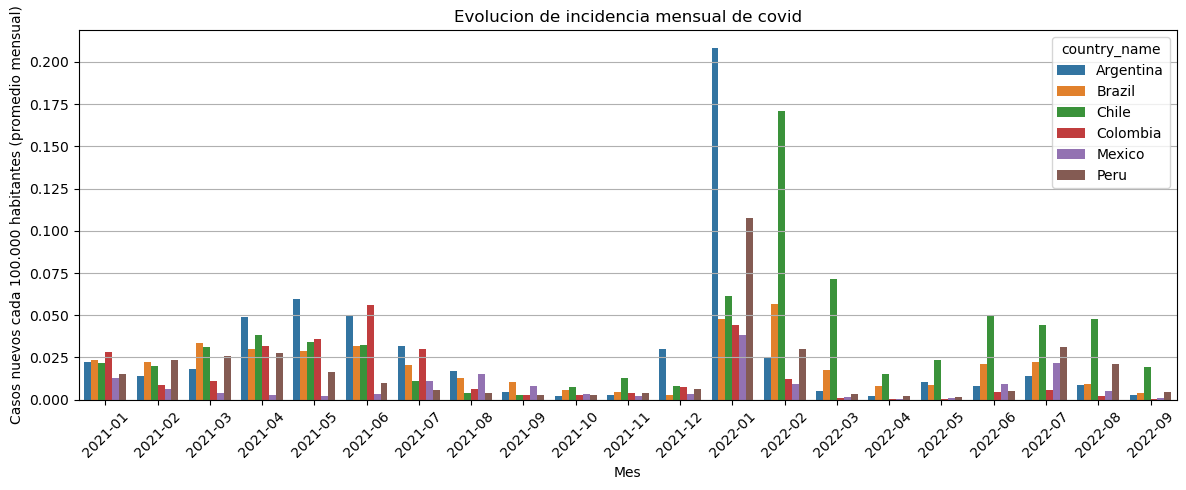

In [92]:
#Creamos la figura
plt.figure(figsize=(12,5))

#Creamos el grafico de barras
sns.barplot(data = df_paises, x = 'mes', y = 'incidencia', hue = 'country_name', errorbar=None) #Eliminamos las barras de error
plt.xticks(rotation = 45)
plt.title("Evolucion de incidencia mensual de covid")
plt.xlabel("Mes")
plt.ylabel("Casos nuevos cada 100.000 habitantes (promedio mensual)")
plt.tight_layout()
plt.grid(axis = 'y')
plt.show()

#### Evolución de dosis administradas por mes de cada Pais.

In [93]:
#Creamos la tasa de vacunacion
df_final_A2['tasa_vacunacion'] = (df_final_A2['cumulative_vaccine_doses_administered'] / df_final_A2['population']) * 100

df_vac = df_final_A2[df_final_A2['country_name'].isin(paises)].copy()

df_vac['mes'] = df_vac['date'].dt.to_period('M')


df_vac_mensual = df_vac.groupby(['country_name', 'mes'])['tasa_vacunacion'].mean().reset_index()

df_vac_mensual['mes'] = df_vac_mensual['mes'].astype(str)



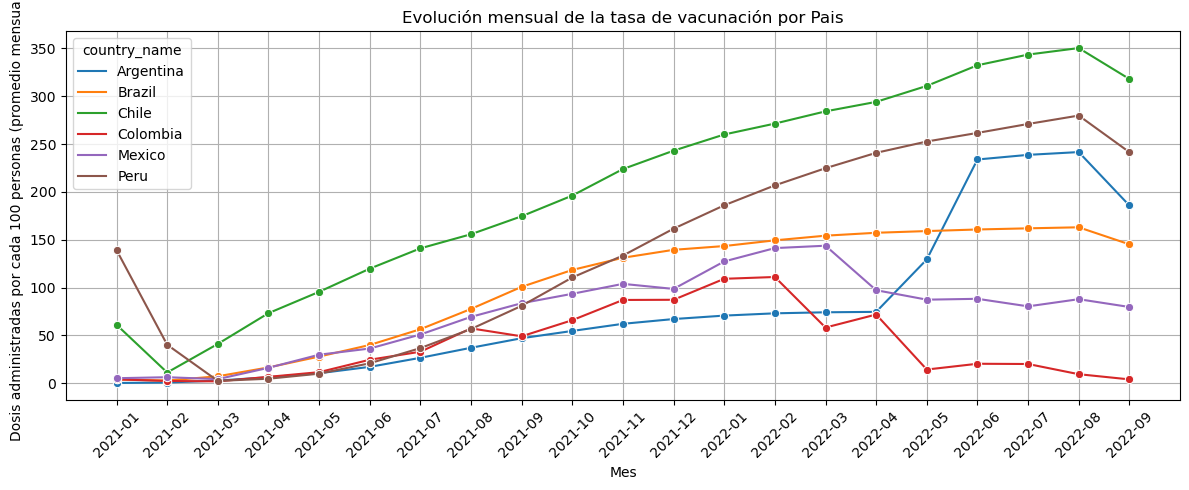

In [65]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_vac_mensual, x='mes', y='tasa_vacunacion', hue='country_name', marker='o')
plt.xticks(rotation=45)
plt.title("Evolución mensual de la tasa de vacunación por Pais")
plt.xlabel("Mes")
plt.ylabel("Dosis administradas por cada 100 personas (promedio mensual)")
plt.grid(True)
plt.tight_layout()
plt.show()



#### Matriz de correlacion

In [ ]:
#Seleccionamos las columnas con datos numericos
numerics_columns = df_final_A2.select_dtypes(include=['int64' , 'float64']).columns

#Creamos la matriz de correlacion
matriz_correlacion = df_final_A2[numerics_columns].corr()


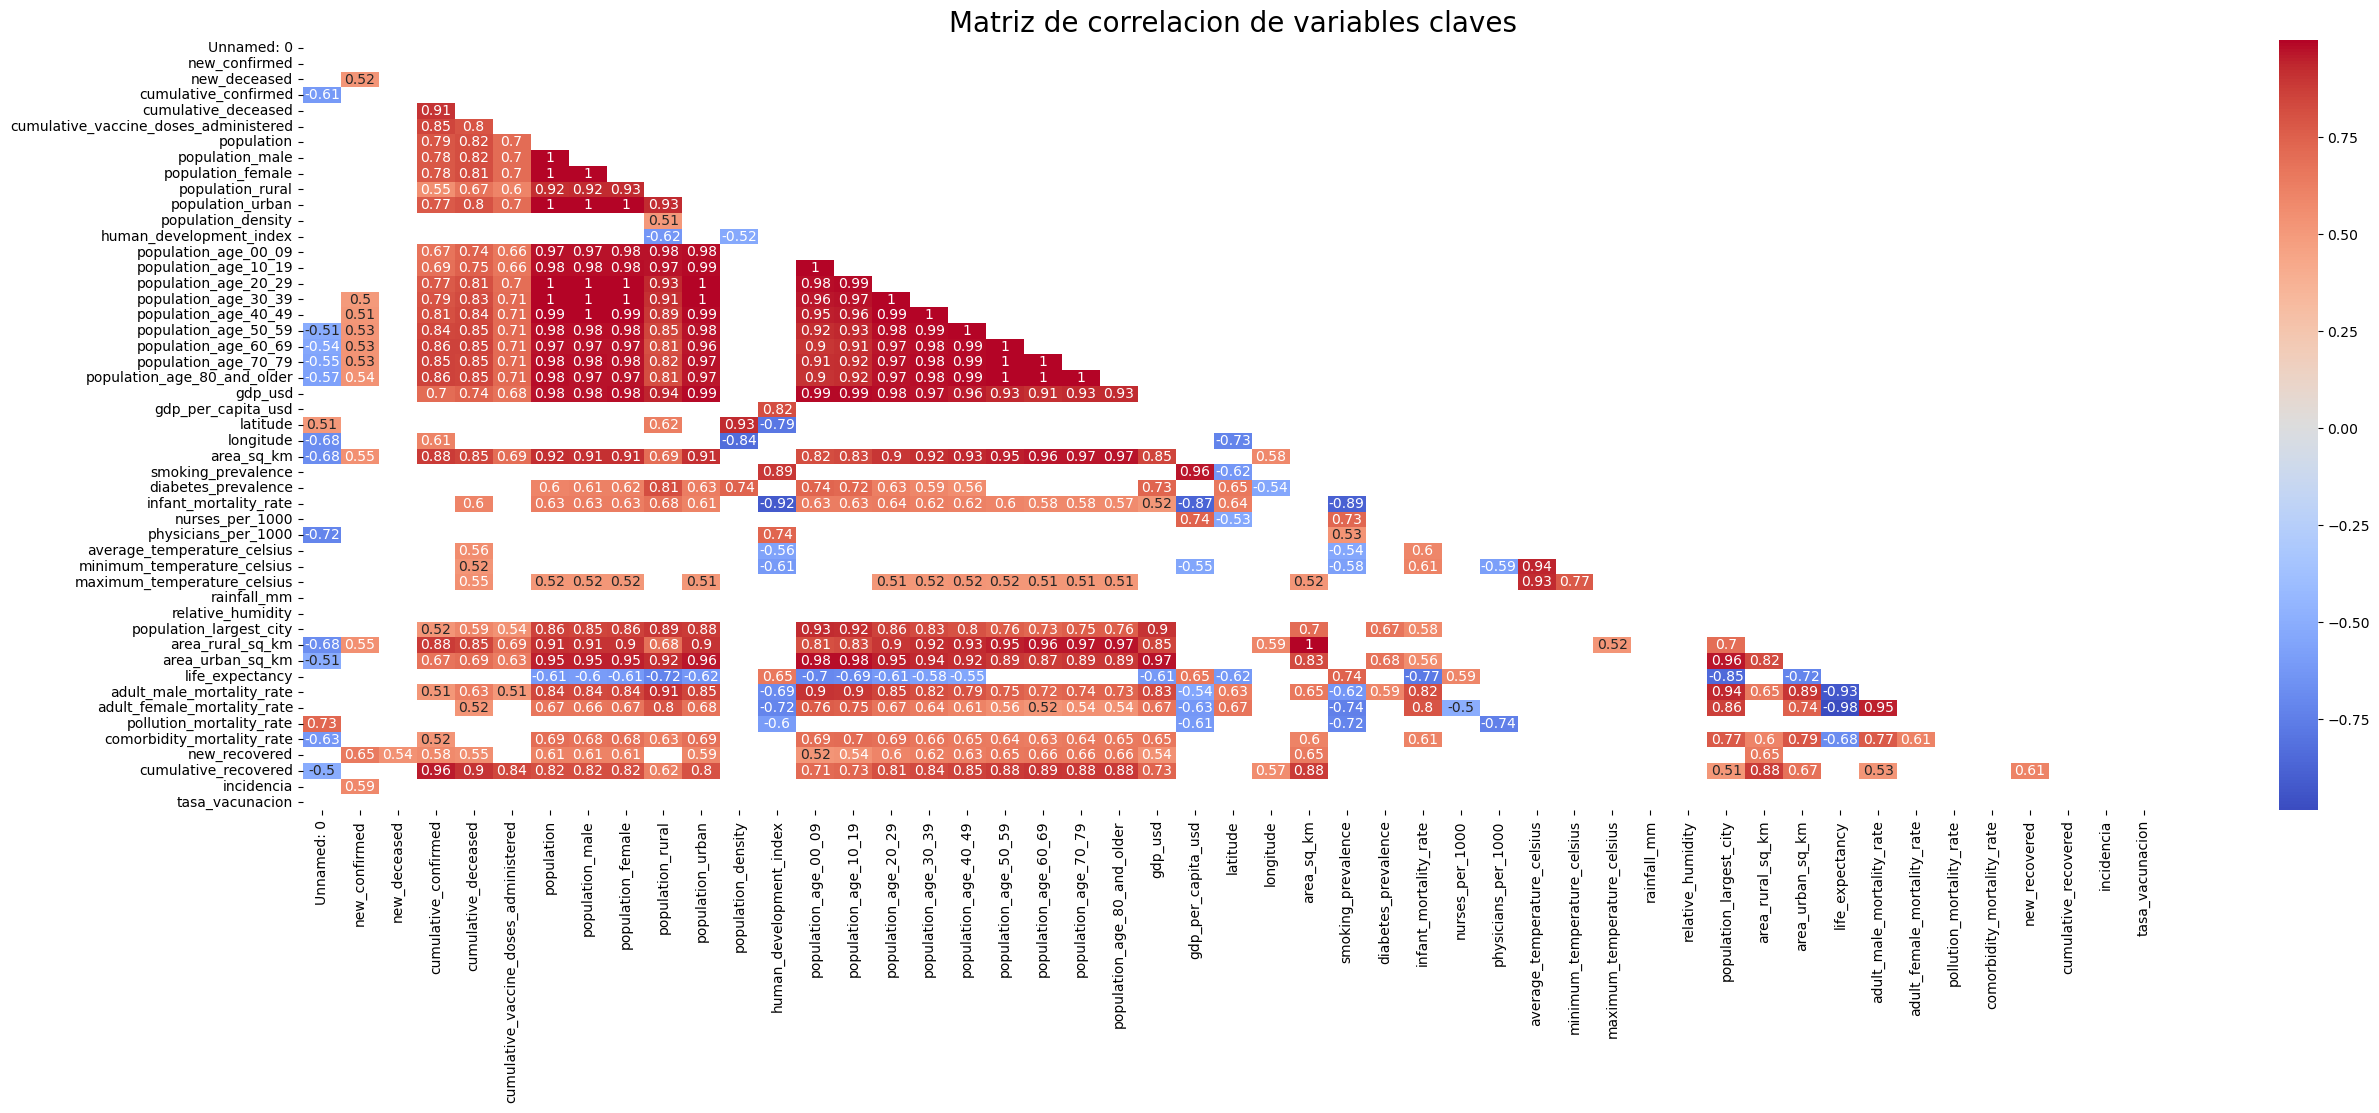

In [67]:
#Creamos la mascara del triangulo superior
mask_s = np.triu(np.ones_like(matriz_correlacion, dtype = bool))

plt.figure(figsize=(30,10))

#Filtramos por los valores mayores a 0.5 (tanto positivos como negativos usando abs())
matriz_correlacion = matriz_correlacion[abs(matriz_correlacion) > 0.5]

sns.heatmap(matriz_correlacion, annot=True, mask=mask_s, cmap =  'coolwarm')

plt.title("Matriz de correlacion de variables claves", fontsize = 20)

plt.show()

#### Grafico de barras de paises contra el resto de variables

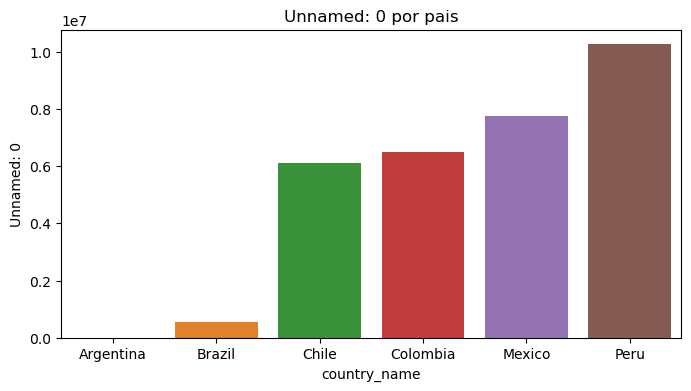

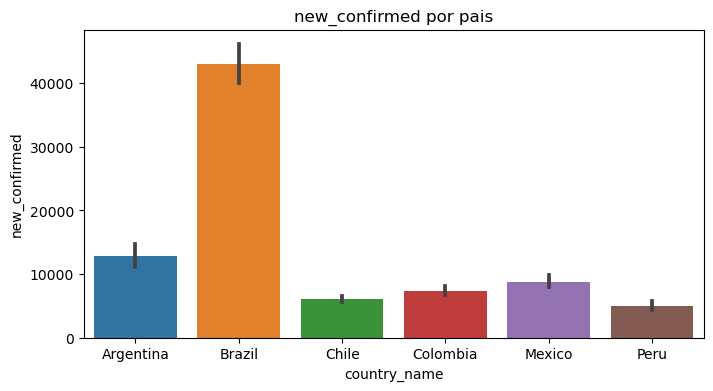

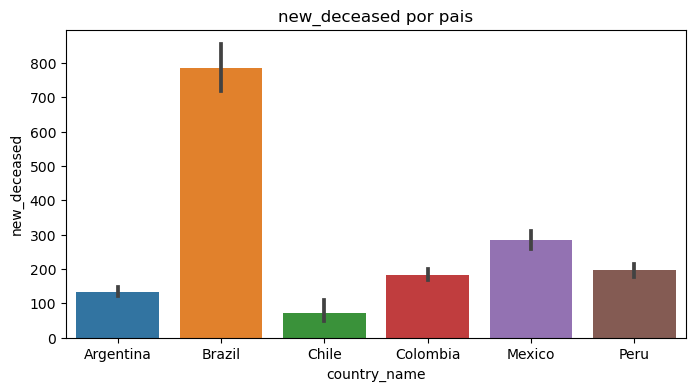

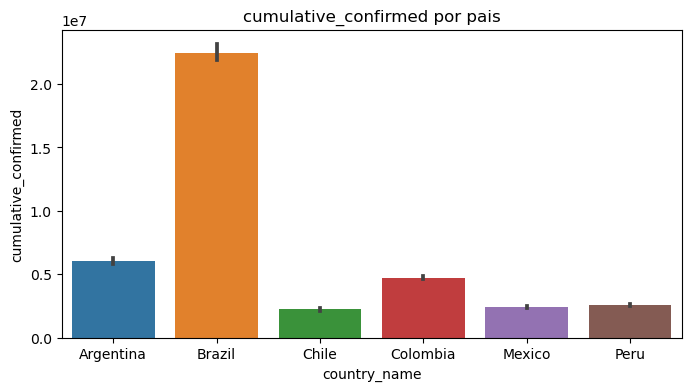

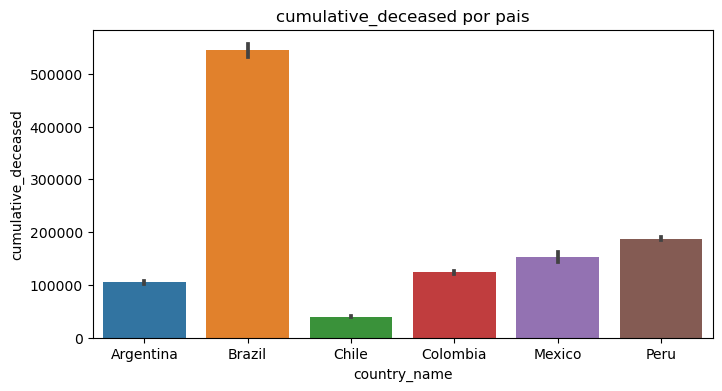

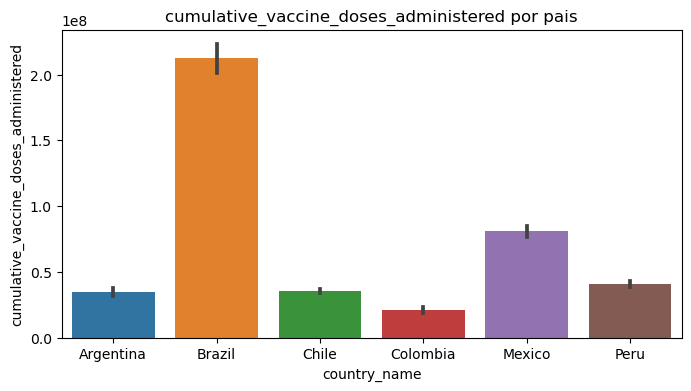

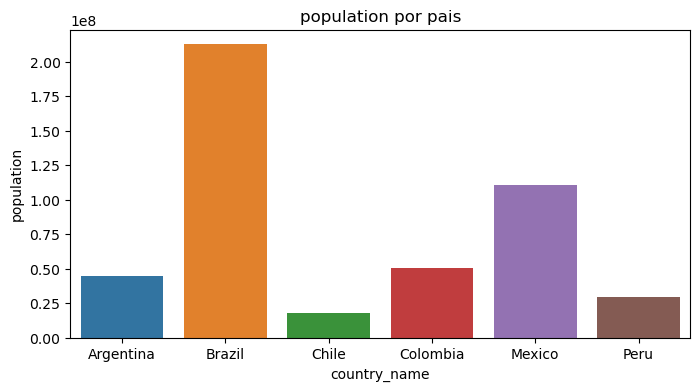

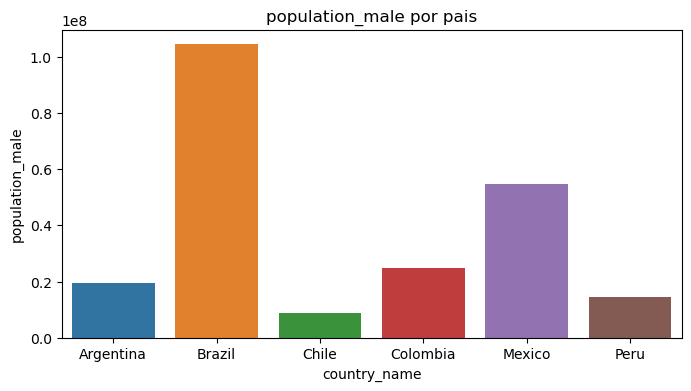

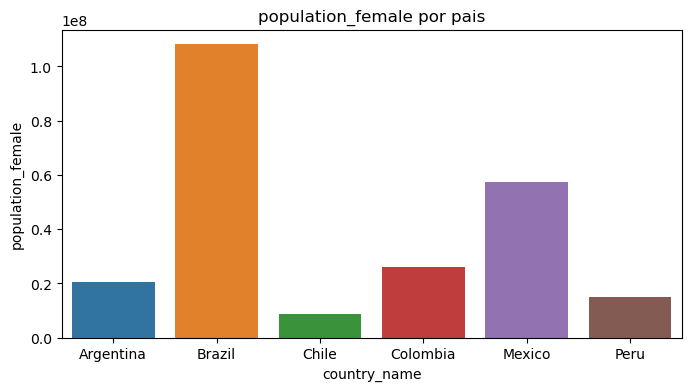

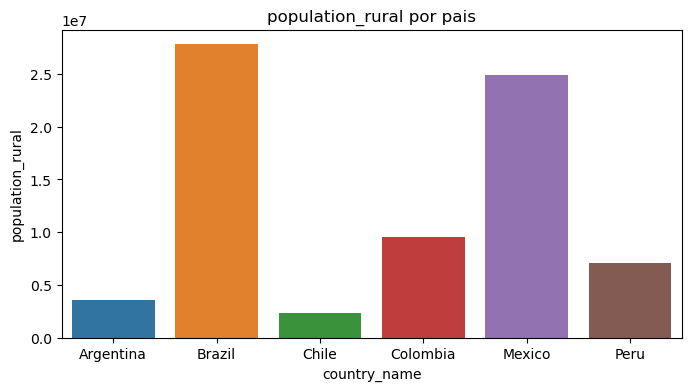

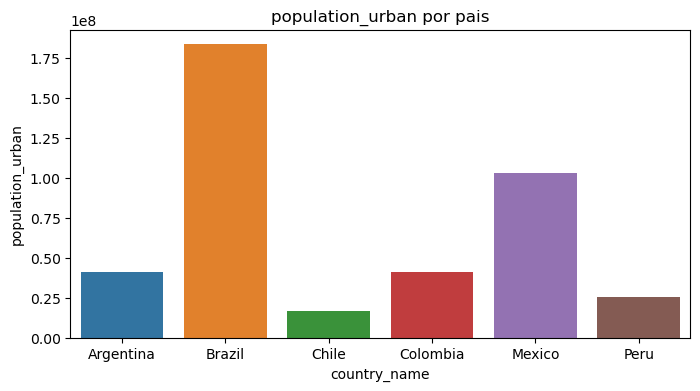

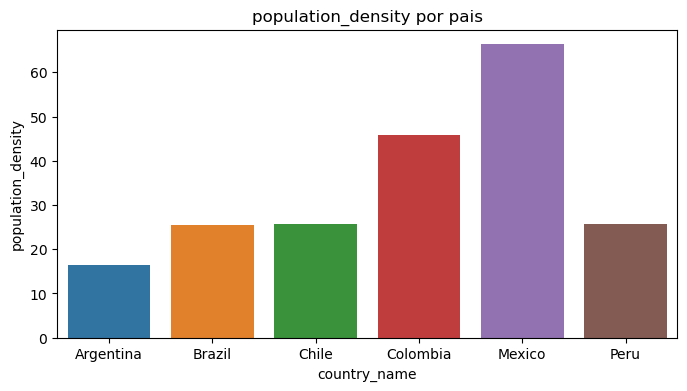

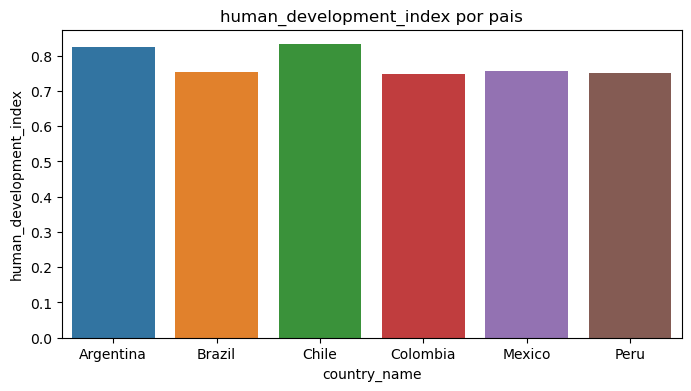

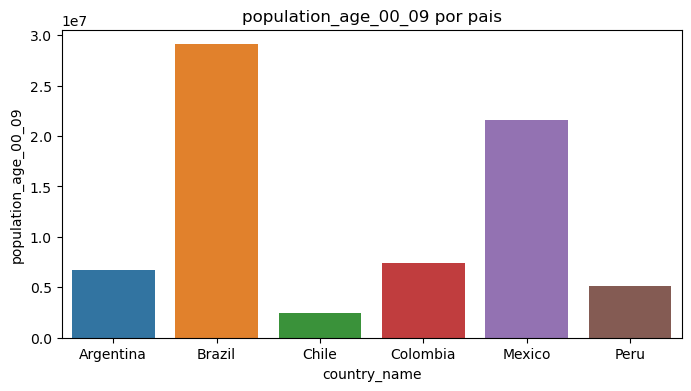

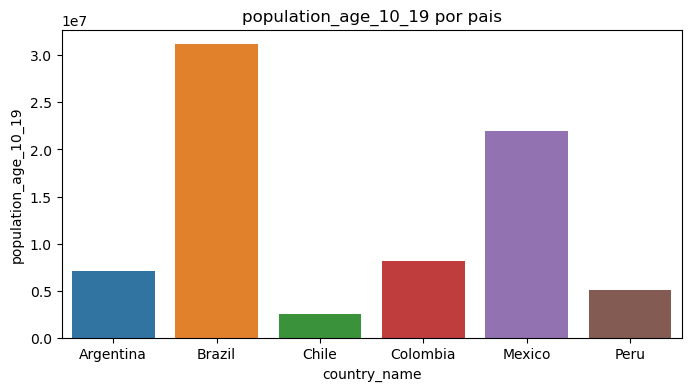

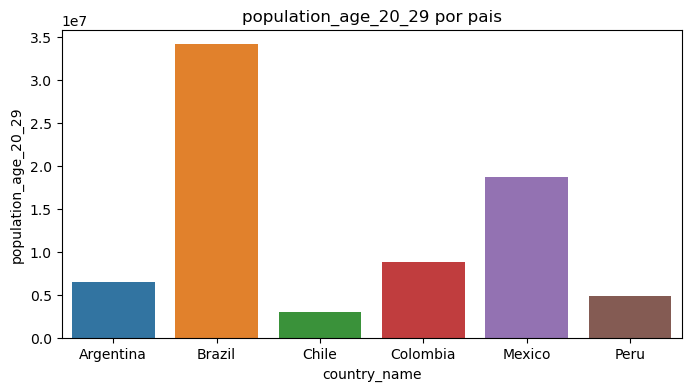

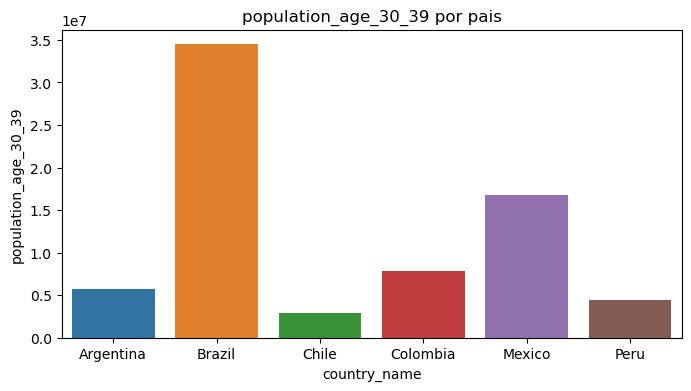

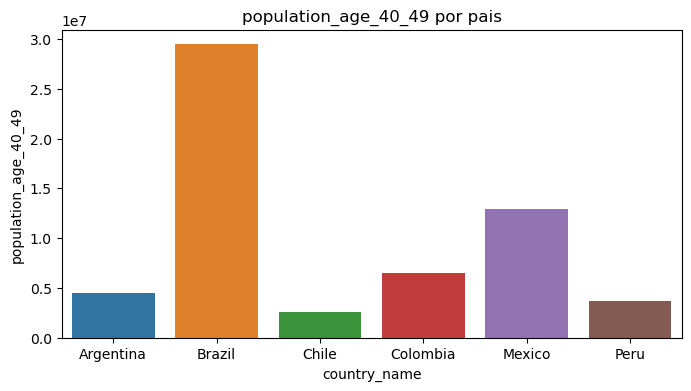

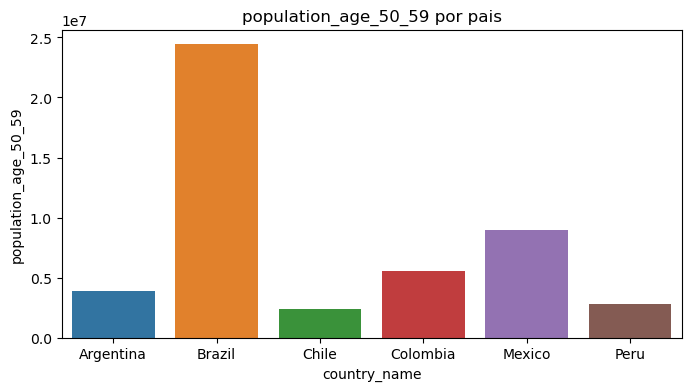

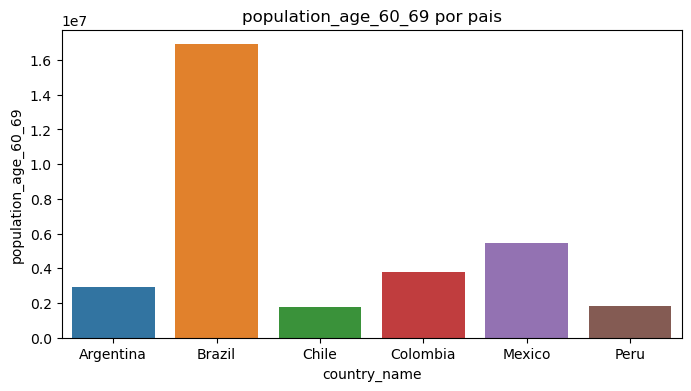

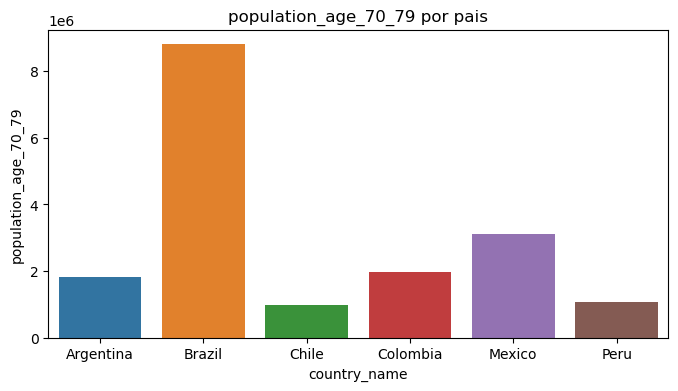

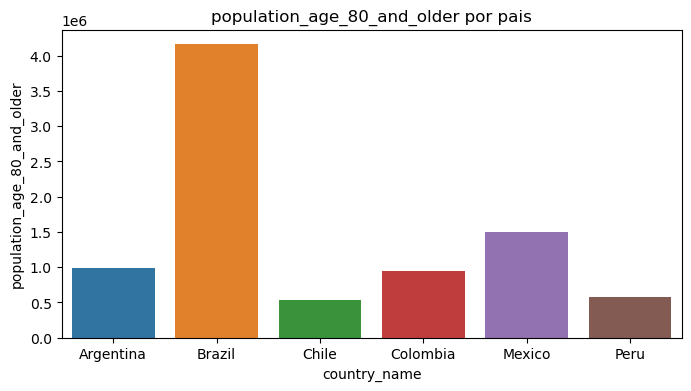

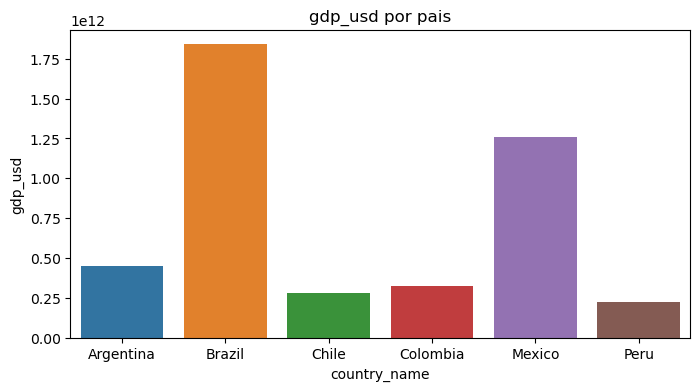

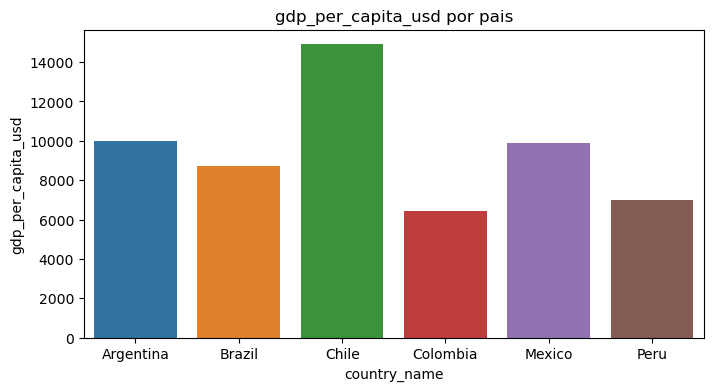

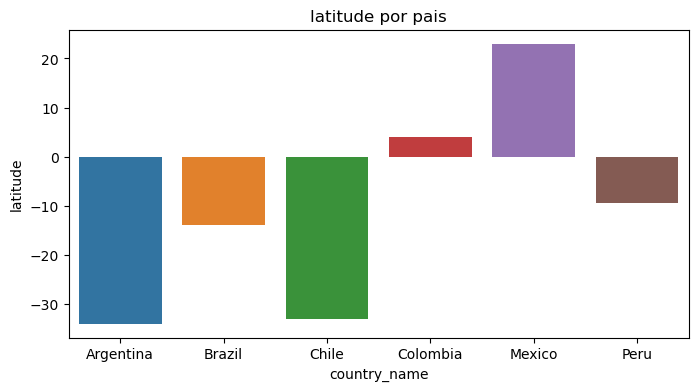

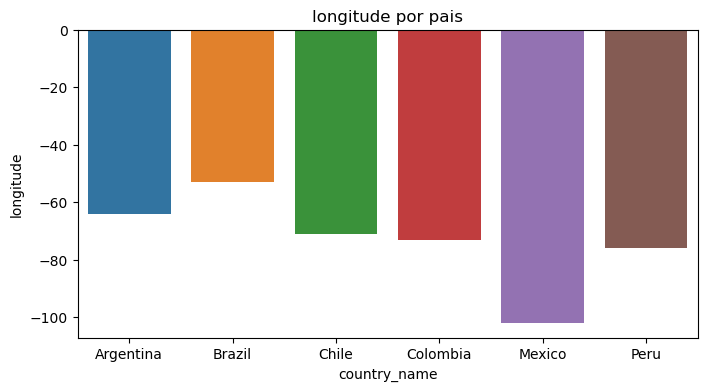

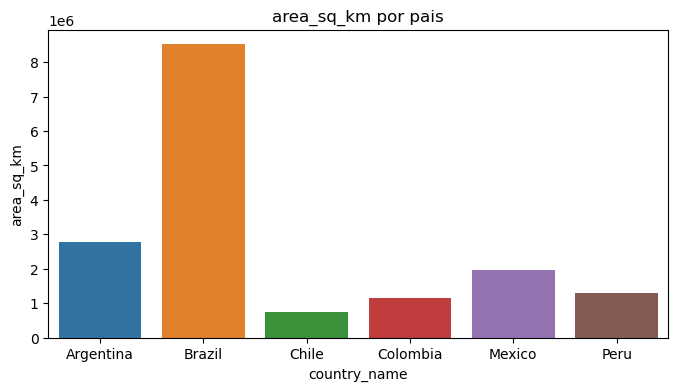

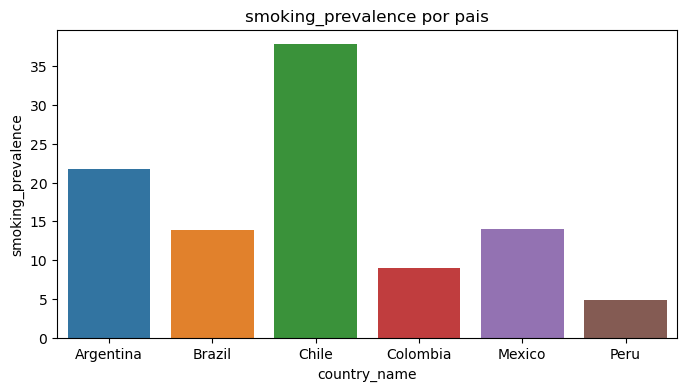

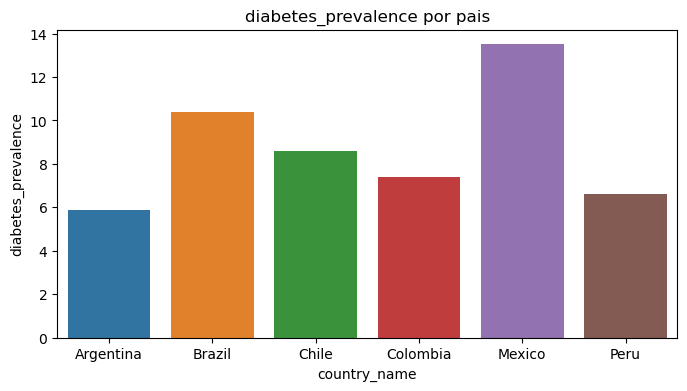

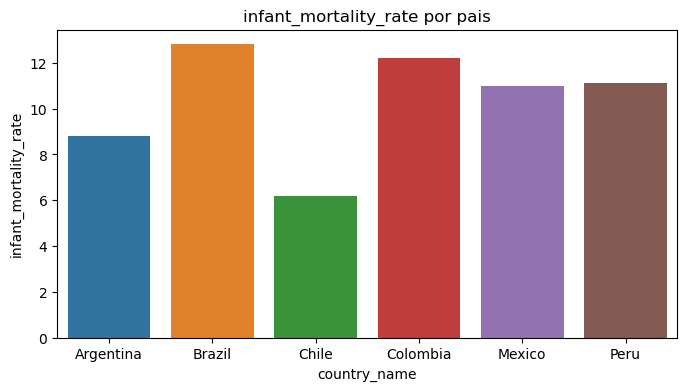

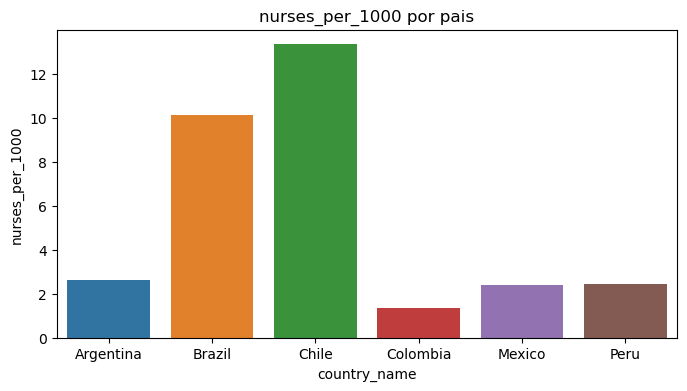

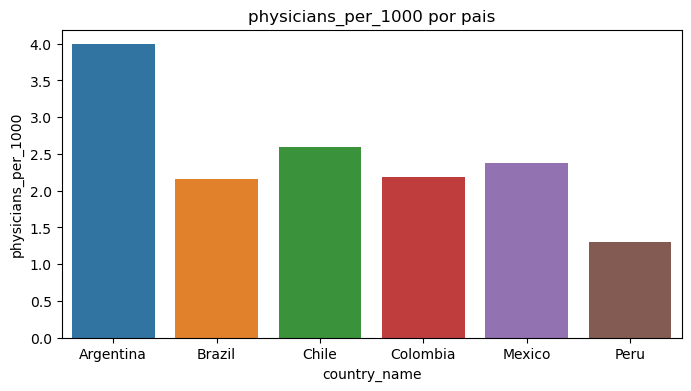

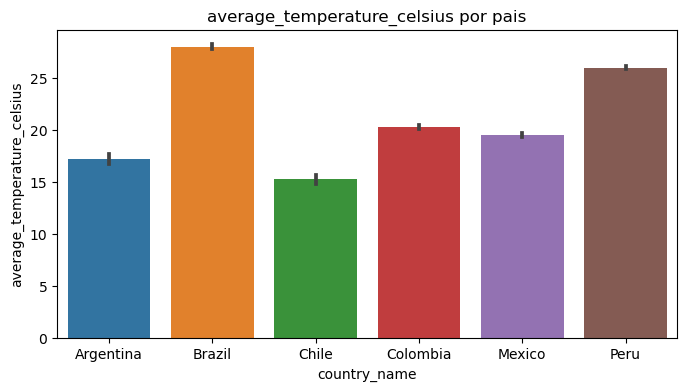

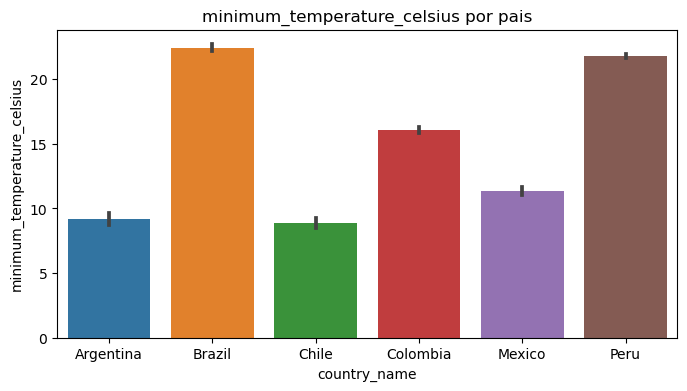

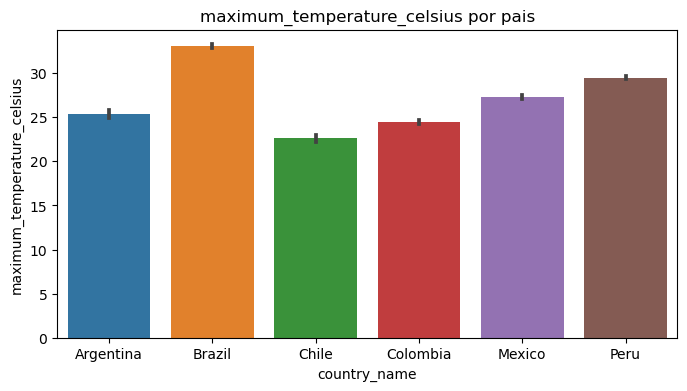

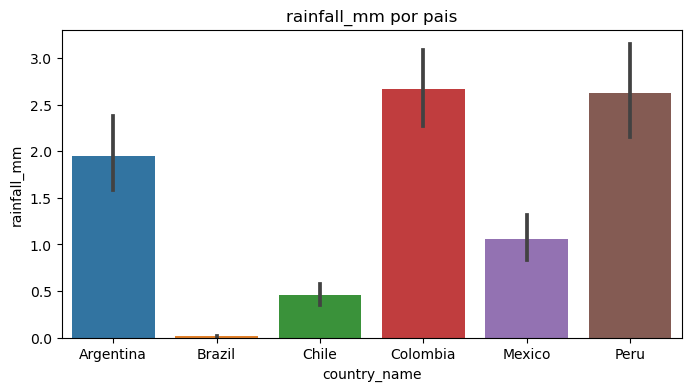

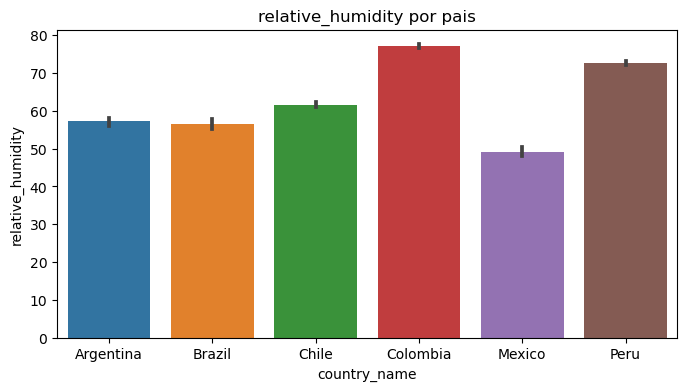

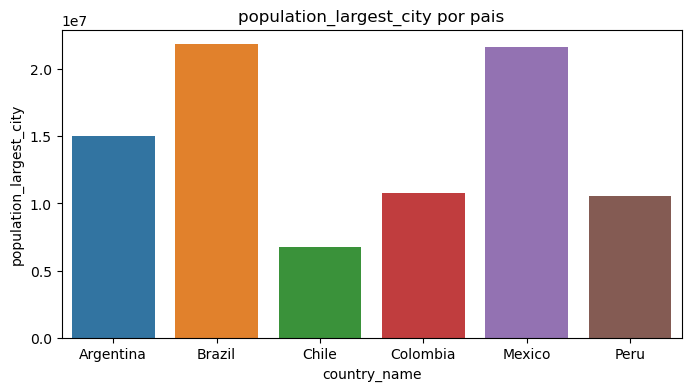

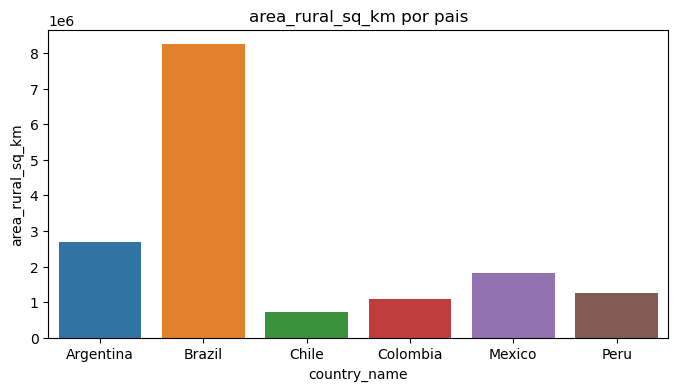

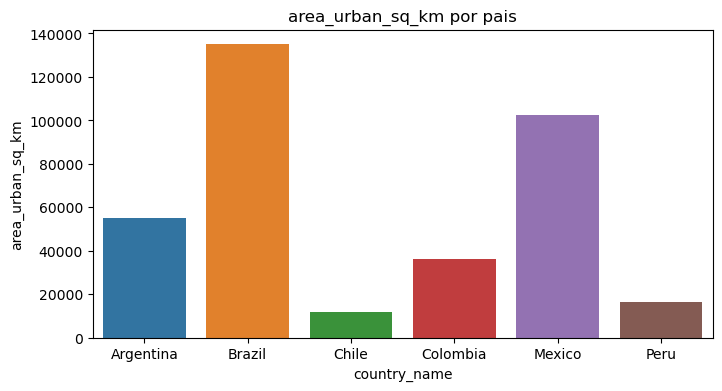

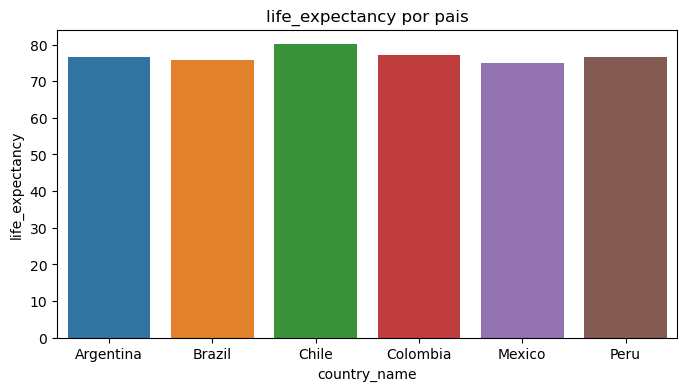

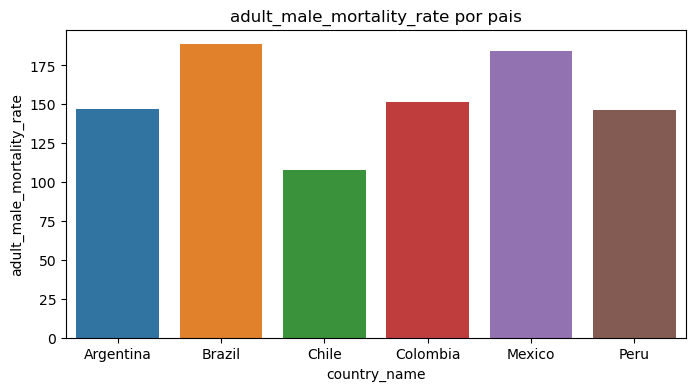

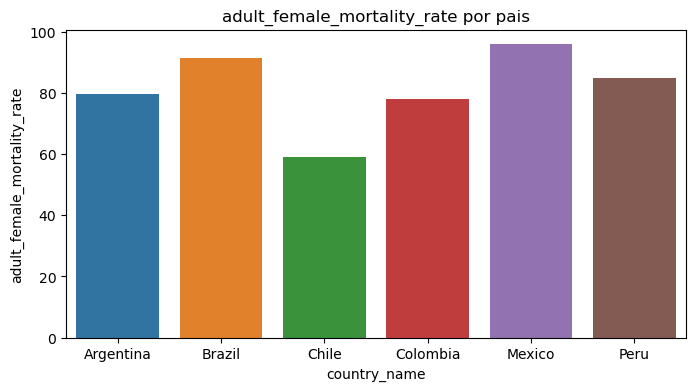

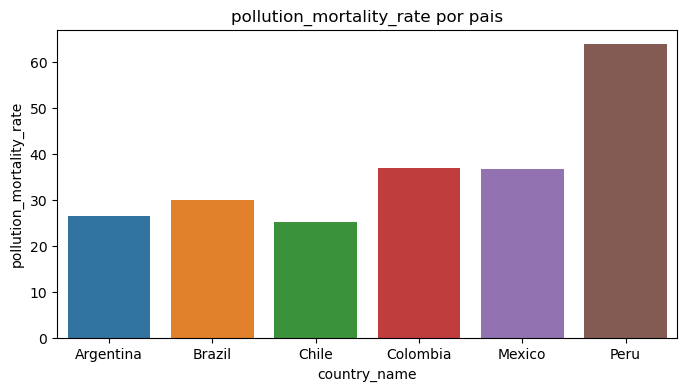

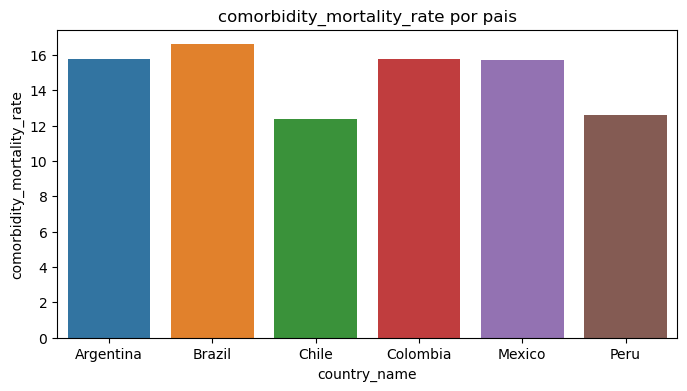

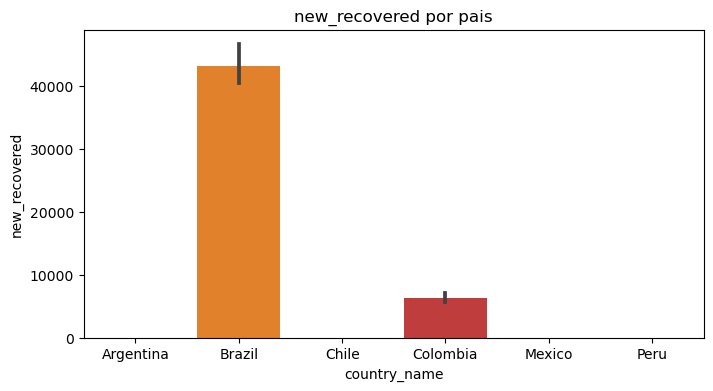

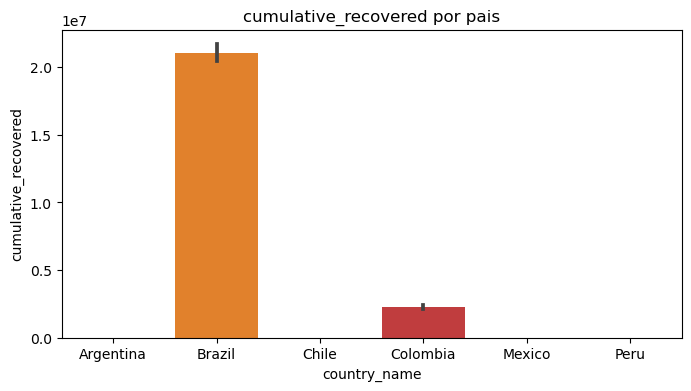

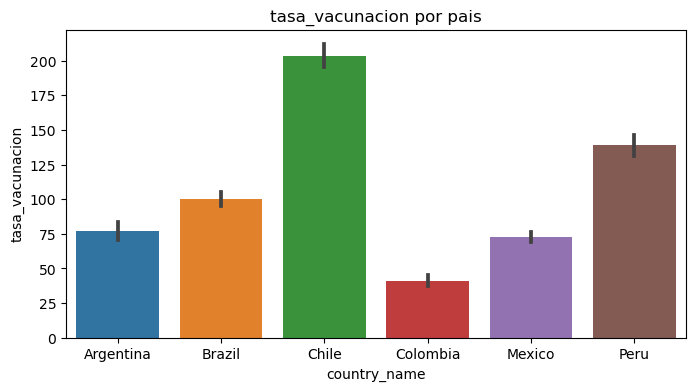

In [95]:
#Con For iteramos cada columna con valores numericos
for i in numerics_columns:
    fig, ax = plt.subplots(figsize = (8,4))
    sns.barplot(x = 'country_name', y = i, data = df_final_A2, ax = ax)
    plt.title(f"{i} por pais")
    plt.show()

#### Histogramas de las variables que “Sí” tenga cambios de valores.

In [96]:
#Primero identificamos que columnas tienen valores unicos con la funcion unique()
variantes = df_final_A2.nunique()

#Filtramos la columnas que tienen valores mayores a uno (que varian) y que nos devuelva el nombre de la columna con .index()
columnas_con_cambios = variantes[variantes > 1].index

#Verificamos si alguna de las columnas esta dentro del index
'average_temperature_celsius' in columnas_con_cambios




True

Text(0.5, 1.0, 'Promedio temperaturas')

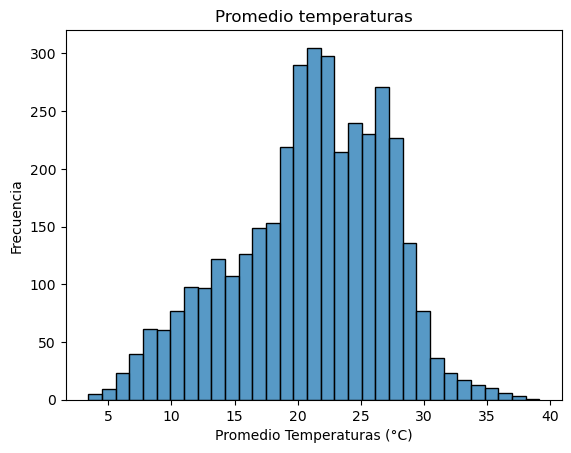

In [97]:
#Creamos un histograma con columnas que tangan datos variables
sns.histplot(data = df_final_A2, x = 'average_temperature_celsius')
plt.xlabel("Promedio Temperaturas (°C)")
plt.ylabel("Frecuencia")
plt.title("Promedio temperaturas")

#### Diagrama de dispersión de la temperatura media contra los casos confirmados.

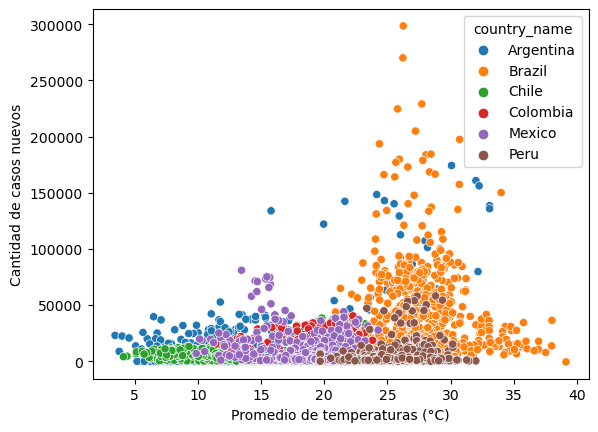

In [98]:
#Creamos el grafico de dispersion, en el eje x el promedio de temperaturas y en el Y la cantidad de confirmados
sns.scatterplot(data = df_final_A2, x = 'average_temperature_celsius', y = 'new_confirmed', hue = 'country_name')
plt.ylabel("Cantidad de casos nuevos")
plt.xlabel("Promedio de temperaturas (°C)")
plt.show()

#### Diagrama de dispersión de la temperatura media contra las muertes confirmadas.

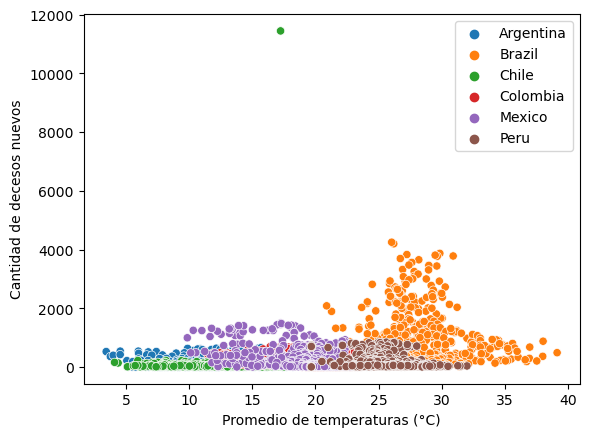

In [99]:
#Creamos el grafico de dispersion, en el eje x el promedio de temperaturas y en el Y la cantidad de muertes confirmadas.
sns.scatterplot(data = df_final_A2, x = 'average_temperature_celsius', y = 'new_deceased', hue = 'country_name')
plt.ylabel("Cantidad de decesos nuevos")
plt.xlabel("Promedio de temperaturas (°C)")
plt.legend(title = False)
plt.show()

#### Comportamiento de las dosis administradas de todos los Paises (Valor medio).

Text(0, 0.5, 'Paises')

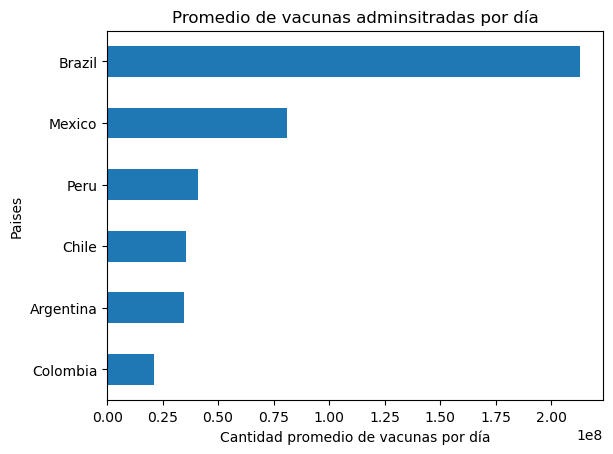

In [100]:
df_final_A2.groupby('country_name')['cumulative_vaccine_doses_administered'].mean().sort_values().plot(kind='barh')
plt.title("Promedio de vacunas adminsitradas por día")
plt.xlabel("Cantidad promedio de vacunas por día")
plt.ylabel("Paises")


#### Recuperaciones, confirmados y recuperados por mes de cada Pais.

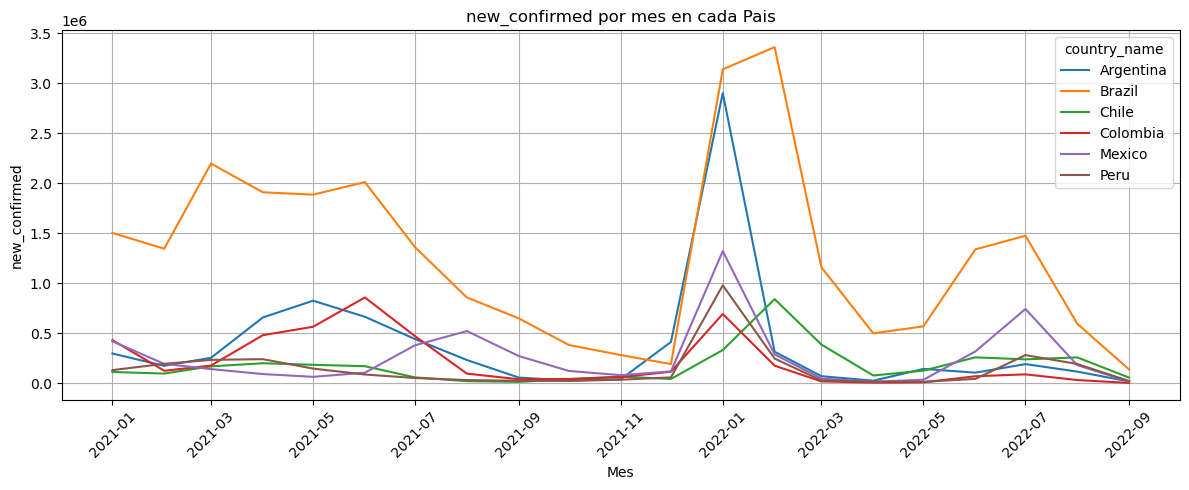

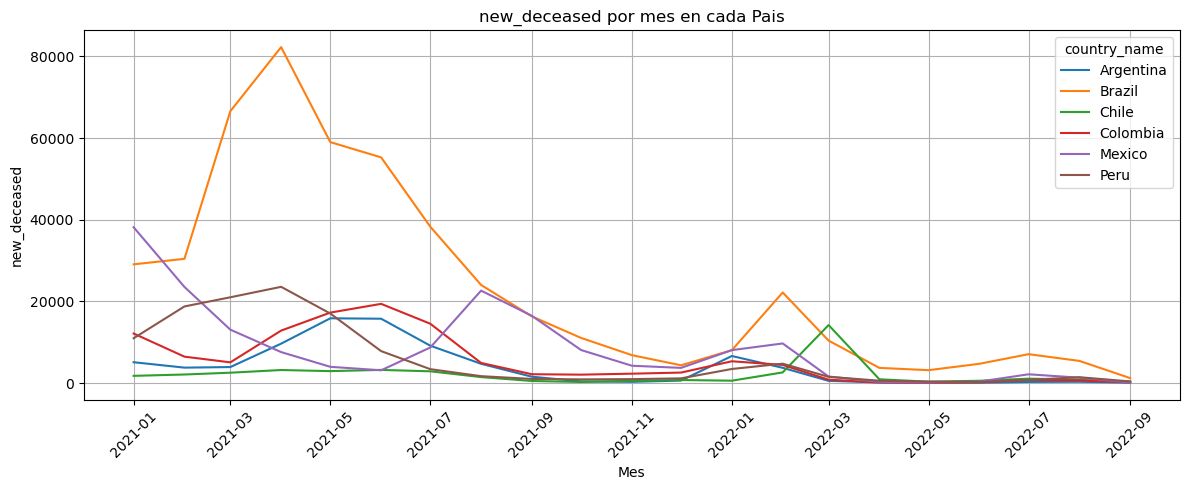

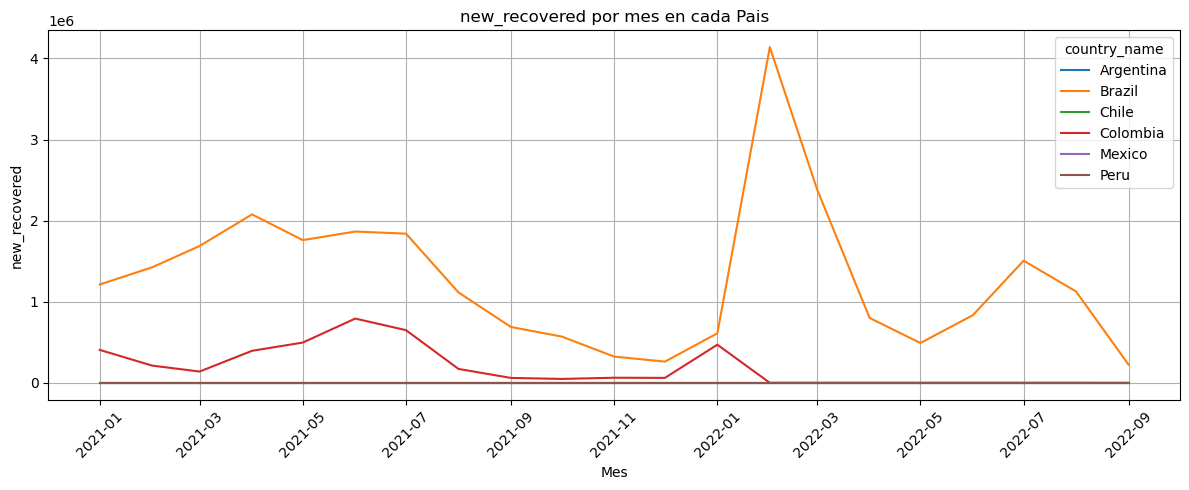

In [101]:
#Debido a que pide tres graficos que son practicamente lo mismo y solo cambia una columna decidimos realizar un buble 
# for para recorrer una lista con las columnas deseadas

#Creamos la lista que vamos a recorrer
lista_casos = ['new_confirmed','new_deceased', 'new_recovered']


for i in lista_casos:
    
    #Primero convertimos la columna date a formato fecha.
    df_final_A2['date'] = pd.to_datetime(df_final_A2['date'])

    #Creamos la columna mes, donde cada fecha se conviernte a un periodo mensual.
    df_final_A2['mes'] = df_final_A2['date'].dt.to_period('M')

    #Agrupamos por pais y mes, y calculamos la suma de new_confirmed en cada grupo creado.
    agrupados = df_final_A2.groupby(['country_name', 'mes'])[i].sum().reset_index()

    #Convertimos la columna mes a fecha real (debido a un error de que seaborn no puede graficar periodos)
    agrupados['mes'] = agrupados['mes'].dt.to_timestamp()

    #Creamos el grafico
    plt.figure(figsize=(12, 5))
    sns.lineplot(data = agrupados, x = 'mes', y = i, hue = 'country_name')
    plt.xticks(rotation=45)
    plt.title(f"{i} por mes en cada Pais")
    plt.xlabel("Mes")
    plt.ylabel(i)
    plt.tight_layout()
    plt.grid(True)
    plt.show()

#### Comparación del Número de Casos Nuevos entre Paises.

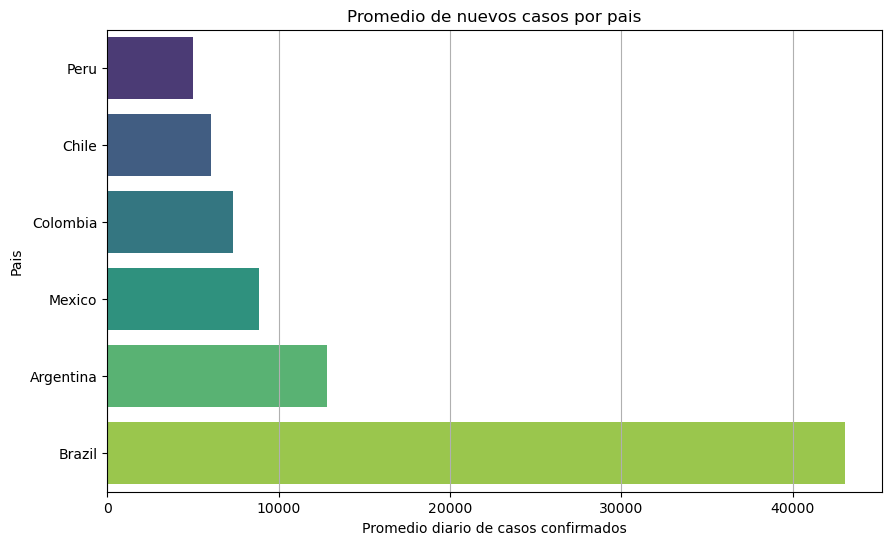

In [ ]:
#Primero agrupamos por el pais y calculamos el promedio de casos confirmados.
df_promedio = df_final_A2.groupby('country_name')['new_confirmed'].mean().sort_values().reset_index()

#Creamos el grafico.
plt.figure(figsize=(10,6))
sns.barplot(data = df_promedio, x = 'new_confirmed', y = 'country_name', palette= 'viridis')
plt.title("Promedio de nuevos casos por pais")
plt.ylabel("Pais")
plt.xlabel("Promedio diario de casos confirmados")
plt.grid(axis = 'x')
plt.tight_layout
plt.show()

#### Dosis acumuladas por Pais

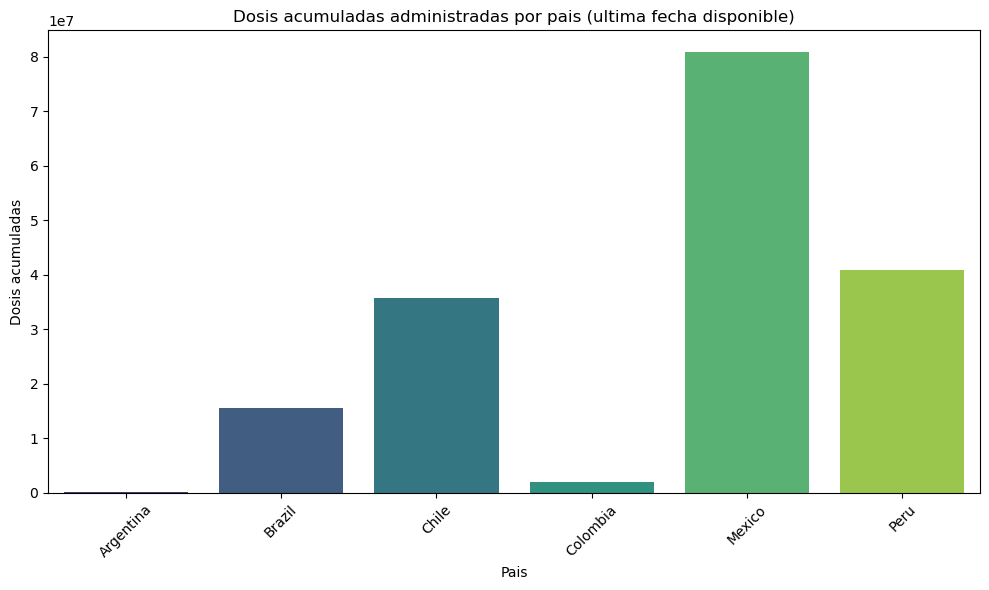

In [ ]:
#Primero agrupamos por pais con el valor maximo de fecha.
ultima_fecha = df_final_A2.groupby('country_name')['date'].max().reset_index()

#Realizamos un merge para unir el df original con el df de ultima_fecha, de este modo obtenemos el valor maximo de fecha por pais
# y podemos ver el valor correspondiente del acumulado de dosis de vacunas administradas.
df_ult = df_final_A2.merge(ultima_fecha, on =['country_name', 'date'])

#Creamos el grafico en cuestion.
plt.figure(figsize=(10,6))
sns.barplot(data = df_ult, x = 'country_name', y = 'cumulative_vaccine_doses_administered', palette = 'viridis')
plt.title("Dosis acumuladas administradas por pais (ultima fecha disponible)")
plt.xlabel("Pais")
plt.ylabel("Dosis acumuladas")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

#### Boxplot de temperatura media de cada Pais.

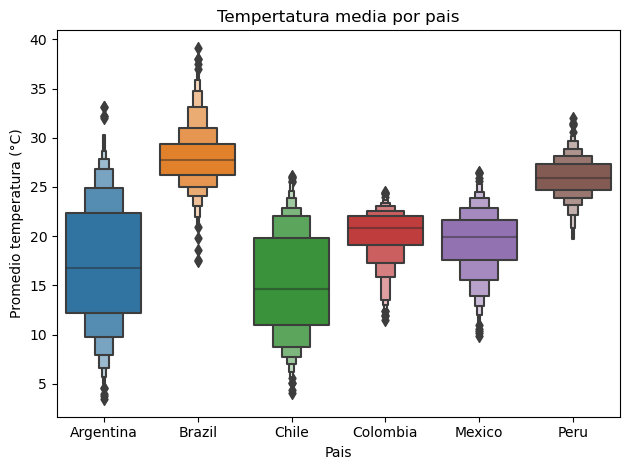

In [102]:
sns.boxenplot(data = df_final_A2, x = 'country_name', y= 'average_temperature_celsius')
plt.title('Tempertatura media por pais')
plt.xlabel('Pais')
plt.ylabel('Promedio temperatura (°C)')
plt.tight_layout()

#### Violinplot de las variables que “Sí” tenga cambios de valores.

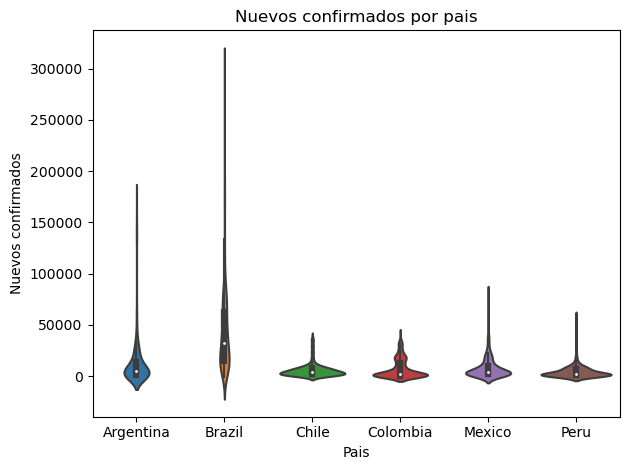

In [103]:
sns.violinplot(data = df_final_A2, x = 'country_name', y= 'new_confirmed')
plt.title('Nuevos confirmados por pais')
plt.xlabel('Pais')
plt.ylabel('Nuevos confirmados')
plt.tight_layout()

#### Distribución de la población por grupos de edad.

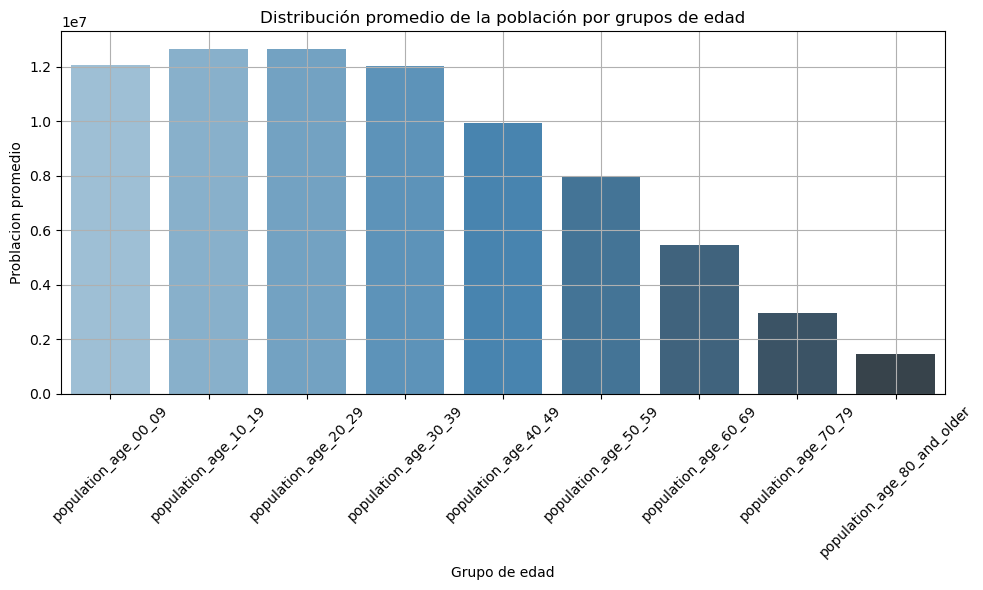

In [ ]:
#Filtramos columnas por edad, iteramos por cada columna y contruimos una lista con los nombres que cumplen con la condicion.
columnas_edad = [col for col in df_final_A2.columns if 'population_age_' in col]

#Calculamos la media por cada grupo de edad.
edad_prom = df_final_A2[columnas_edad].mean().reset_index()
edad_prom.columns = ['grupo_edad', 'poblacion_promedio']

#Creamos el grafico en cuestion
plt.figure(figsize=(10, 6))
sns.barplot(data=edad_prom, x='grupo_edad', y='poblacion_promedio', palette='Blues_d')
plt.xticks(rotation=45)
plt.title('Distribución promedio de la población por grupos de edad')
plt.xlabel('Grupo de edad')
plt.ylabel('Problacion promedio')
plt.tight_layout()
plt.grid(True)
plt.show()

#### Mapa de calor de Métricas por Pais.

(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'life_expectancy'),
  Text(1.5, 0, 'gdp_per_capita_usd'),
  Text(2.5, 0, 'diabetes_prevalence')])

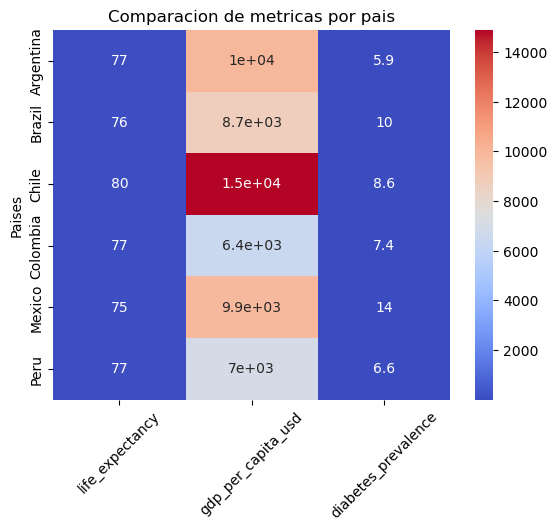

In [ ]:
#Creamos una lista con las metricas que vamos a utilizar
col_metricas = ['country_name','life_expectancy','gdp_per_capita_usd','diabetes_prevalence']

#En un nuevo df agrupamos por country name calculando el promedio de las metricas
df_mapa = df_final_A2[col_metricas].groupby('country_name').mean()

#Creamos el grafico solicitado
sns.heatmap(df_mapa, annot=True,cmap='coolwarm')
plt.title("Comparacion de metricas por pais")
plt.ylabel("Paises")
plt.xticks(rotation = 45)

#### Diagrama de barras apilado de comparación de la tasa de mortalidad masculina vs. femenina por Pais.

Text(0.5, 0, 'Pais')

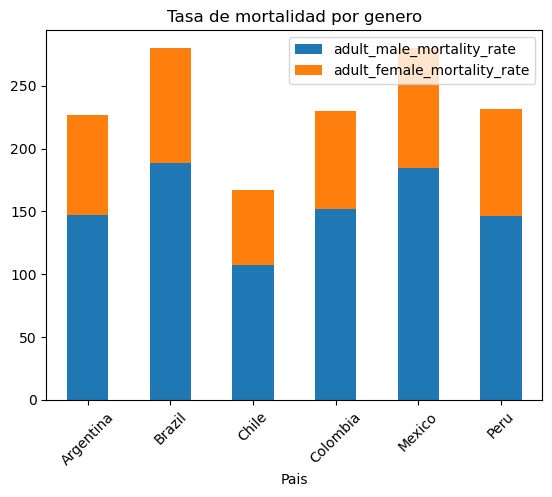

In [ ]:
df_mortalidad = df_final_A2.groupby('country_name')[['adult_male_mortality_rate','adult_female_mortality_rate']].mean()
df_mortalidad.plot(kind = 'bar', stacked = True)
plt.title("Tasa de mortalidad por genero")
plt.xticks(rotation = 45)
plt.xlabel("Pais")

#### Matriz de correlación de indicadores demográficos y de salud.

<Axes: >

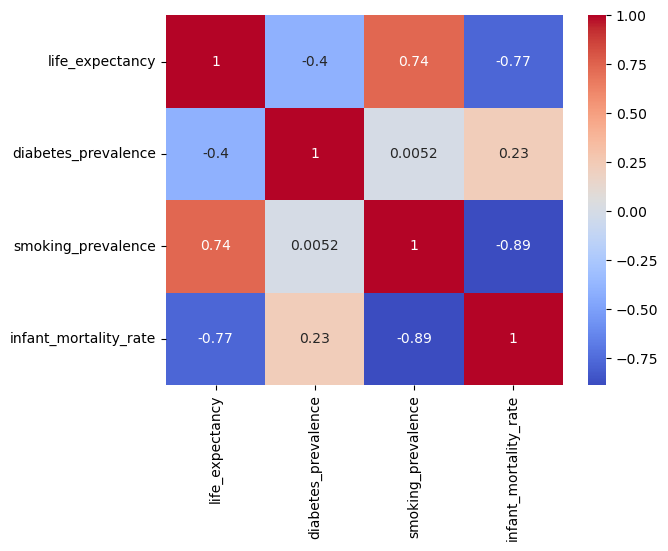

In [ ]:
#Creamos las columnas que vamos a correlacionar
columnas = ['life_expectancy', 'diabetes_prevalence', 'smoking_prevalence', 'infant_mortality_rate']
corr = df_final_A2[columnas].corr()

#Creamos el grafico en cuestion
sns.heatmap(corr, annot=True, cmap='coolwarm')

#### Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad.

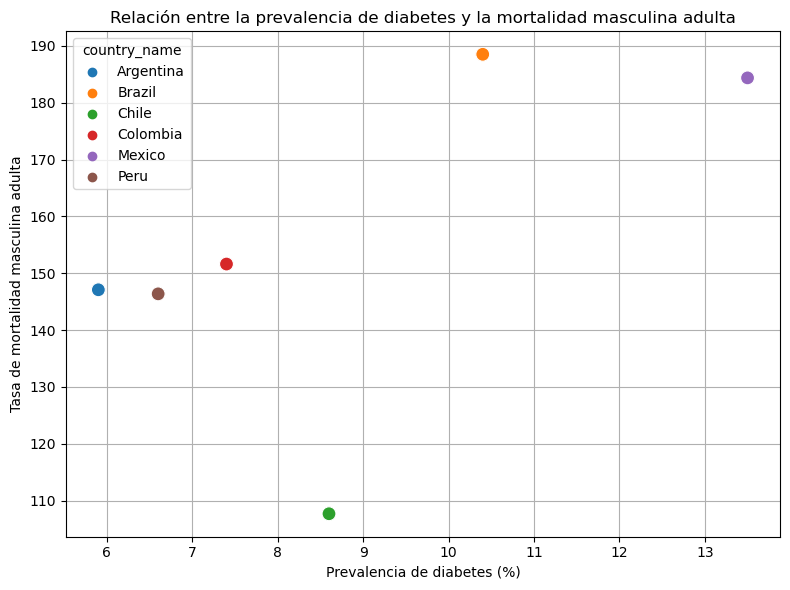

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_final_A2, x='diabetes_prevalence', y='adult_male_mortality_rate', hue='country_name', s=100)
plt.title('Relación entre la prevalencia de diabetes y la mortalidad masculina adulta')
plt.xlabel('Prevalencia de diabetes (%)')
plt.ylabel('Tasa de mortalidad masculina adulta')
plt.grid(True)
plt.tight_layout()
plt.show()

## Tercer Avance

EDA con Numpy y Pandas

### Punto 2

In [107]:
# Importamos las librerias requeridas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Punto 3

#### ¿Influyó la vacunación en la reducción de casos?

In [108]:
#Seleccionamos los paises de interes teniendo en cuenta que en la columna new_recovered hay datos 
# en 0 en todos los paises excepto brazil y colombia
paises_interes = ['Brazil','Colombia']

#Seleccionamos la columnas que requerimos para el analisis que vamos a abordar
columnas_utiles = ['date','country_name','new_confirmed','new_recovered','tasa_vacunacion','new_deceased']

#Copiamos el dataset original con los paises de interes y con las columnas utiles
df_filtrado = df_final_A2[df_final_A2['country_name'].isin(paises_interes)][columnas_utiles].copy()

#Convertimos a fecha la columna date
df_filtrado['date'] = pd.to_datetime(df_filtrado['date'])

#Ordenamos el dataset obtenido por nombre pais y fecha
df_filtrado = df_filtrado.sort_values(['country_name','date'])

In [109]:
#Vamos a crear una ventana deslizante con los ultimos 7 dias para suavizar los datos en las columnas de new_confirmed y tasa_vacunacion
#Utilizaremos transform junto con lambda para modificar la columna original manteniendo la estructura.

df_filtrado['new_confirmed_rolling'] = df_filtrado.groupby('country_name')['new_confirmed'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

df_filtrado['tasa_vacunacion_rolling'] = df_filtrado.groupby('country_name')['tasa_vacunacion'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

In [110]:
#Creamos una columna de tasa de vacunacion con un lag de 14 dias, debido a lo que tardaria en hacer efecto la vacuna
#Tambien aplicaremos .transform junto con lambda
df_filtrado['tasa_vacunacion_lag14'] = df_filtrado.groupby('country_name')['tasa_vacunacion'].transform(lambda x: x.shift(14))

#### Grafico de lineas: Evolucion de casos vs vacunacion

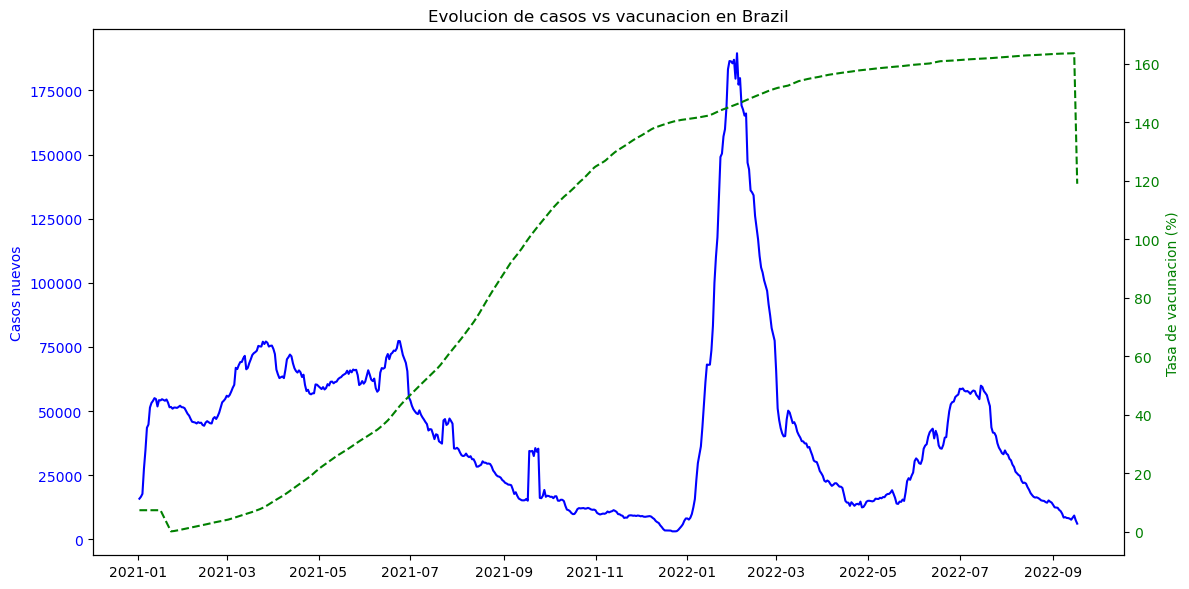

In [111]:
#Vamos a crear el grafico

#seleccionamos el pais de interes
pais = "Brazil"
df_pais = df_filtrado[df_filtrado['country_name'] == pais]

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(df_pais['date'], df_pais['new_confirmed_rolling'],color = 'blue', label = "Casos nuevos media movil (14 dias)")
ax1.set_ylabel("Casos nuevos", color = 'blue')
ax1.tick_params(axis = 'y', labelcolor = 'blue')

ax2 = ax1.twinx()
ax2.plot(df_pais['date'], df_pais['tasa_vacunacion_rolling'], color = 'green', label = "Tasa de vacunacion", linestyle = '--')
ax2.set_ylabel("Tasa de vacunacion (%)", color = 'green')
ax2.tick_params(axis='y', labelcolor = 'green')

plt.title(f"Evolucion de casos vs vacunacion en {pais}")
fig.tight_layout()
plt.show()

Podemos observar que en ambos paises hay un pico en la misma fecha, podria deberse a otros factores externos, estacionalidad, etc. Aun asi puede verse una tendencia a la baja con el aumento de la vacunacion.

#### Grafico de regresion: Relacion entre vacunacion y casos nuevos

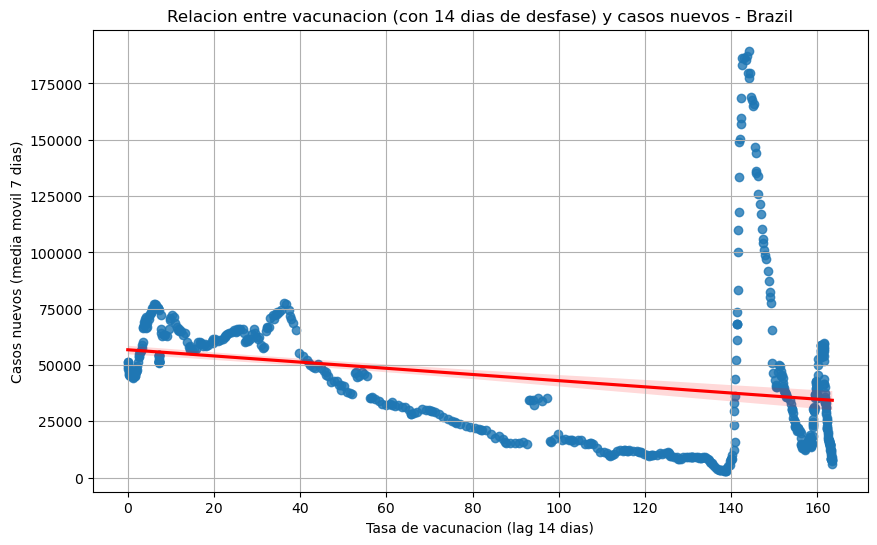

In [112]:
#Vamos a crear un grafico de regresion para poder observar si hay una relacion positiva o negativa entre la tasa de vacunacion y
#  la cantidad de casos nuevos
df_reg = df_filtrado[df_filtrado["country_name"] == pais].copy()

plt.figure(figsize=(10,6))
sns.regplot(data=df_reg, x="tasa_vacunacion_lag14", y="new_confirmed_rolling", line_kws={"color": "red"})
plt.title(f"Relacion entre vacunacion (con 14 dias de desfase) y casos nuevos - {pais}")
plt.xlabel("Tasa de vacunacion (lag 14 dias)")
plt.ylabel("Casos nuevos (media movil 7 dias)")
plt.grid(True)
plt.show()

En este grafico podemos observar que la linea tiene tendencia a la baja, lo que indicaria que a mayor tasa de vacunacion, la cantidad de nuevos confirmados tambien baja. Tambien podemos observar el intervalo de confianza (el borde rojo transparante alrededor de la linea) que indica que tan confiable es la prediccion, cuanto mas angosta, mas precisa es.

#### Grafico de lineas: Casos vs muertes

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19160\3425120530.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pais['new_deceased_rolling'] = df_pais['new_deceased'].rolling(window=7, min_periods=1).mean()
C:\Users\Usuario\AppData\Local\Temp\ipykernel_19160\3425120530.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pais['new_deceased_rolling_lag7'] = df_pais['new_deceased_rolling'].shift(-7)


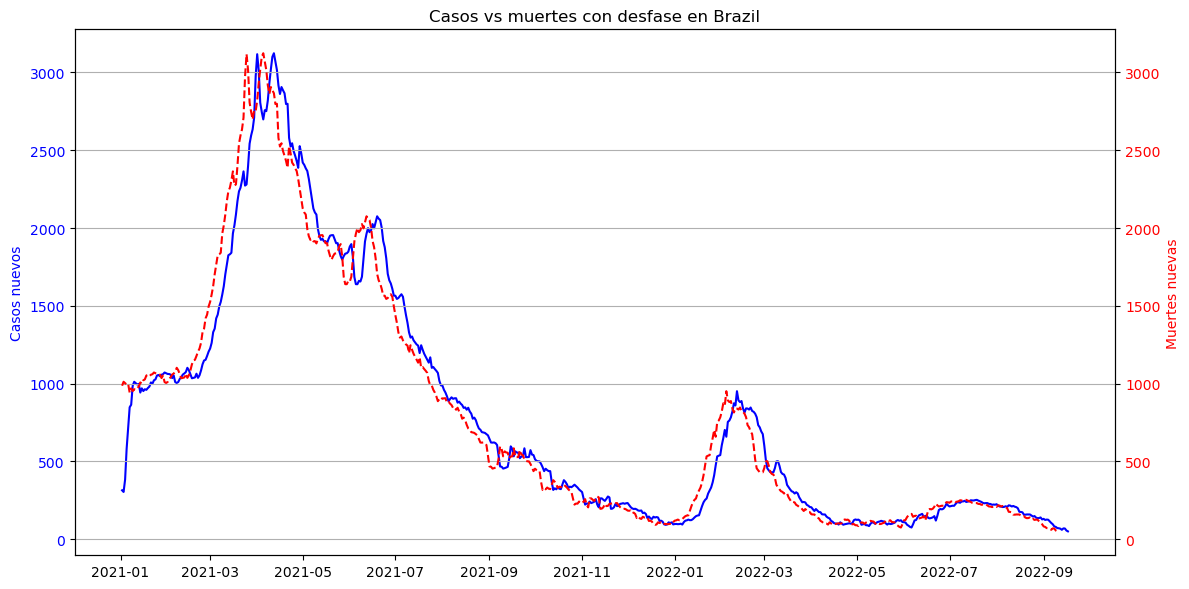

In [113]:
#Agregamos la columna de media movil que nos falta
df_pais['new_deceased_rolling'] = df_pais['new_deceased'].rolling(window=7, min_periods=1).mean()

#Atrasamos las muertes 14 dias para que coincidan con contagios previos
df_pais['new_deceased_rolling_lag7'] = df_pais['new_deceased_rolling'].shift(-7)


#creamos el grafico
fig, ax1 = plt.subplots(figsize = (12,6))

ax1.plot(df_pais['date'], df_pais['new_deceased_rolling'], label = "Casos nuevos", color = 'blue')
ax1.set_ylabel("Casos nuevos", color = 'blue')
ax1.tick_params(axis = 'y', labelcolor = 'blue')

ax2 = ax1.twinx()
ax2.plot(df_pais['date'], df_pais['new_deceased_rolling_lag7'], label = "Nuevas muertes con lag de 7 dias", linestyle = '--', color = 'red')
ax2.set_ylabel("Muertes nuevas", color = 'red')
ax2.tick_params(axis = 'y', labelcolor = 'red')

plt.title(f"Casos vs muertes con desfase en {pais}")
fig.tight_layout()
plt.grid(True)
plt.show()

En este grafico podemos observar que ambas graficas coinciden practicamente, solo habria que modificar el desfase ya que al parecer los datos presentaban ya el desfase correspondiente. Al poner el desfase en cero, las lineas coinciden. 

#### Grafico de autocorrelacion

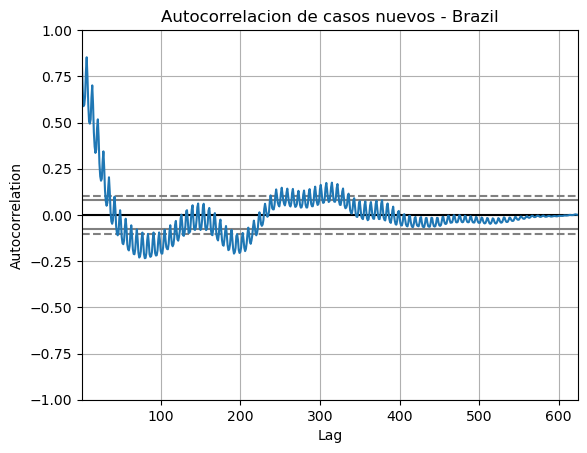

In [114]:
from pandas.plotting import autocorrelation_plot

df_pais_corr = df_filtrado[df_filtrado['country_name'] == pais]
autocorrelation_plot(df_pais_corr['new_confirmed'])
plt.title(f"Autocorrelacion de casos nuevos - {pais}")
plt.show()

En el grafico presentado podemos observar como comienza con una correlacion alta, lo cual es esperable con lag cero y despues va disminuyendo con un patron de ondas, lo qe sugiere cierta oscilacion periodica, posiblemente semanal. Por lo tanto podemos decir que tiene dependencia a corto plazo y no hay una estionalidad clara.

### Punto 4

En este punto vamos a relizar dos grafico comparativos entre los dos paises que tienen mejores datos, Brazil y Coliombia. Vamos a aplicar una media movil para suavizar los datos.

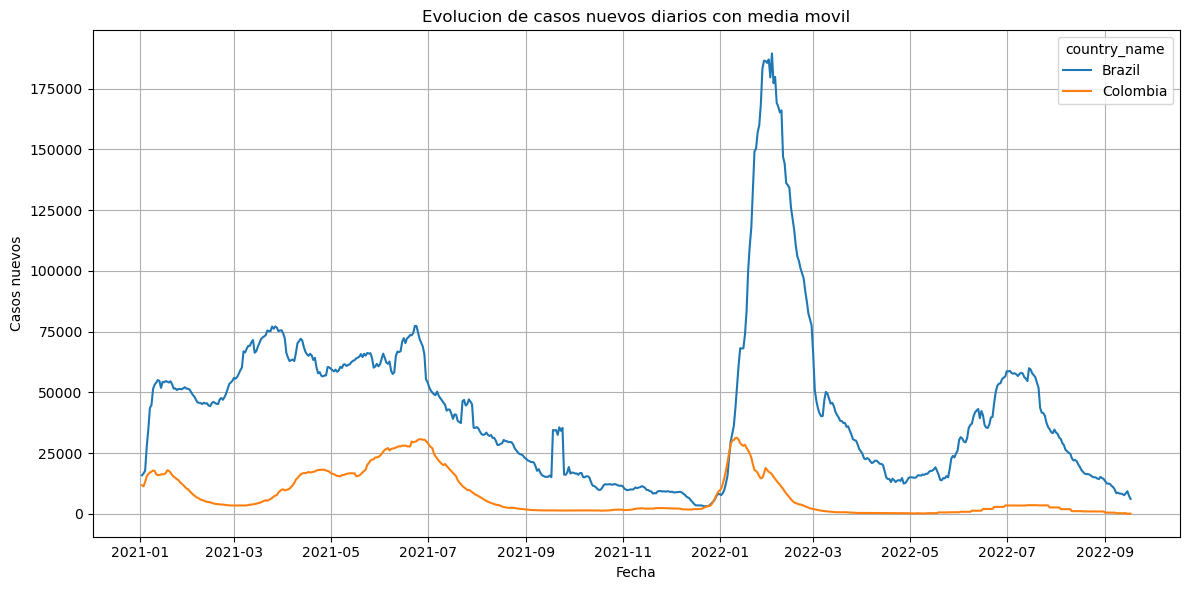

In [115]:
# Calculamos la media movil para los dos paises que vamos a comparar
df_filtrado['new_confirmed_rolling'] = df_filtrado.groupby('country_name')['new_confirmed'].transform(lambda x: x.rolling(window = 7, min_periods = 1).mean())

df_filtrado['tasa_vacunacion_rolling'] = df_filtrado.groupby('country_name')['tasa_vacunacion'].transform(lambda x: x.rolling(window = 7, min_periods = 1).mean())

#Creamos el grafico
plt.figure(figsize = (12,6))
sns.lineplot(data = df_filtrado, x = 'date', y = 'new_confirmed_rolling', hue = 'country_name')
plt.title("Evolucion de casos nuevos diarios con media movil")
plt.xlabel("Fecha")
plt.ylabel("Casos nuevos")
plt.grid(True)
plt.tight_layout()
plt.show()

Podemos observar ciertos patrones en ambos paises, con una diferencia en cantidades notable debido a la diferencia en poblacion.


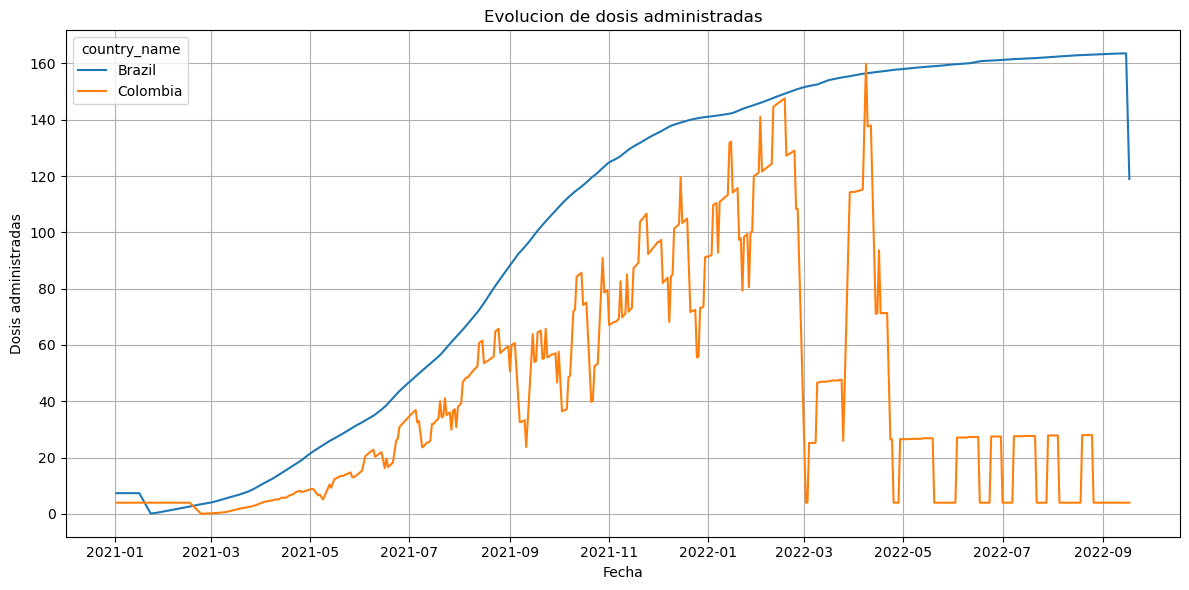

In [116]:
#Creamos el segundo grafico de la evolucion de la tasa de dosis administradas
plt.figure(figsize = (12,6))
sns.lineplot(data = df_filtrado, y = 'tasa_vacunacion_rolling', x = 'date', hue = 'country_name')
plt.title("Evolucion de dosis administradas")
plt.xlabel("Fecha")
plt.ylabel("Dosis administradas")
plt.grid(True)
plt.tight_layout()

Podemos observar un tendencia similar en ambos paises, aunque en colombia se puede observar un grafico mas erratico, probablemente a la forma en que se cargaron los datos de las fuentes oficiales, con dias donde no se cargaron los datos para despues cargarlos de golpe un dia.


### Punto 5

Vamos a crear una matriz para comparar las variables y ver asi si hay correlacion entre algunas de ellas.

In [117]:
#Chequeamos que columnas vamos a utilizar, descartamos columnas con constantes o con valores no numericos
df_brasil = df_final_A2[df_final_A2["country_name"] == "Brazil"]
df_brasil.nunique()


Unnamed: 0                               624
location_key                               1
date                                     624
country_code                               1
country_name                               1
new_confirmed                            620
new_deceased                             491
cumulative_confirmed                     623
cumulative_deceased                      623
cumulative_vaccine_doses_administered    604
population                                 1
population_male                            1
population_female                          1
population_rural                           1
population_urban                           1
population_density                         1
human_development_index                    1
population_age_00_09                       1
population_age_10_19                       1
population_age_20_29                       1
population_age_30_39                       1
population_age_40_49                       1
population

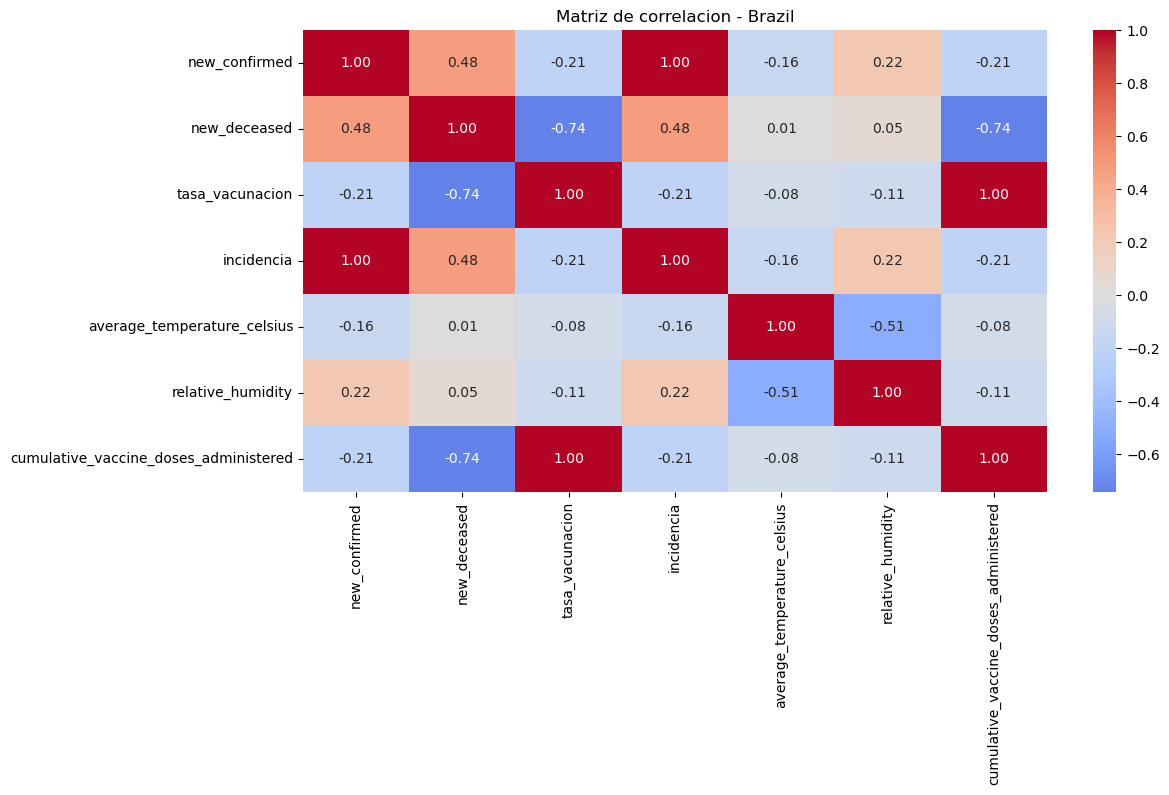

In [118]:
#Primero seleccionamos las columnas de interes
col_interes = ['new_confirmed','new_deceased', 'tasa_vacunacion','incidencia','average_temperature_celsius','relative_humidity','cumulative_vaccine_doses_administered']

df_corr = df_final[df_final['country_name'] == 'Brazil'][col_interes]

df_matriz = df_corr.corr()

plt.figure(figsize = (12,6))
sns.heatmap(df_matriz, annot = True, cmap = 'coolwarm', fmt = '.2f', center = 0 )
plt.title("Matriz de correlacion - Brazil")
plt.show()

Podemos observar varia corelaciones, por ejemplo, a mayor temperatura bajan los nuevos casos confirmados, esto se debe a que cuanto mayor frio hace la gente suele encerrarse y ventilar menos los lugares de uso comun o transporte publico. Claramente que cuanto mas dosis administadas de vacunas hay baja la cantidad de nuevos muertos.

### Punto 6

In [119]:
#Vamos a crear una funcion para calcular y comparar entre dos paises la varianza, la media y la mediana.
def resumen_estadistico (df, paises, columnas):

    #creamos una lista para almacenar los resultados de las funciones estadisticas.
    resumen = []

    #Con for iteramos entre los paises que vamos a comparar
    for pais in paises:
        datos_pais = df[df['country_name'] == pais]

        #Otra vez con for, pero para iterar entre cada columna otorgada y aplicarle las funciones estadisticas
        for columna in columnas:
            resumen.append({
                'Pais': pais,
                'Columna': columna,
                'Media': datos_pais[columna].mean(),
                'Mediana': datos_pais[columna].median(),
                'Varianza': datos_pais[columna].var()
            })
    return pd.DataFrame(resumen)

In [120]:
#Creamos la lista de paises a comparar
paises = ['Brazil','Colombia']

#Creamos la lista de columnas que vamos a analizar
columnas = ['cumulative_vaccine_doses_administered', 'incidencia', 'tasa_vacunacion']

#Inicializamos la funcion
resumen_df = resumen_estadistico(df_final,paises,columnas)

print(resumen_df)

       Pais                                Columna         Media  \
0    Brazil  cumulative_vaccine_doses_administered  2.128492e+08   
1    Brazil                             incidencia  2.025701e-02   
2    Brazil                        tasa_vacunacion  1.001363e+02   
3  Colombia  cumulative_vaccine_doses_administered  2.090165e+07   
4  Colombia                             incidencia  1.446516e-02   
5  Colombia                        tasa_vacunacion  4.107796e+01   

        Mediana      Varianza  
0  2.723424e+08  1.675015e+16  
1  1.523433e-02  3.474097e-04  
2  1.281253e+02  3.707303e+03  
3  2.018681e+06  7.370609e+14  
4  4.799256e-03  3.298215e-04  
5  3.967309e+00  2.846819e+03  


In [121]:
#Pivoteamos la tabla para una mejor lectura
pivot_multi = resumen_df.pivot_table(index=['Columna'], columns='Pais', values=['Media', 'Mediana', 'Varianza'])
print(pivot_multi)


                                              Media                \
Pais                                         Brazil      Colombia   
Columna                                                             
cumulative_vaccine_doses_administered  2.128492e+08  2.090165e+07   
incidencia                             2.025701e-02  1.446516e-02   
tasa_vacunacion                        1.001363e+02  4.107796e+01   

                                            Mediana                \
Pais                                         Brazil      Colombia   
Columna                                                             
cumulative_vaccine_doses_administered  2.723424e+08  2.018681e+06   
incidencia                             1.523433e-02  4.799256e-03   
tasa_vacunacion                        1.281253e+02  3.967309e+00   

                                           Varianza                
Pais                                         Brazil      Colombia  
Columna                           

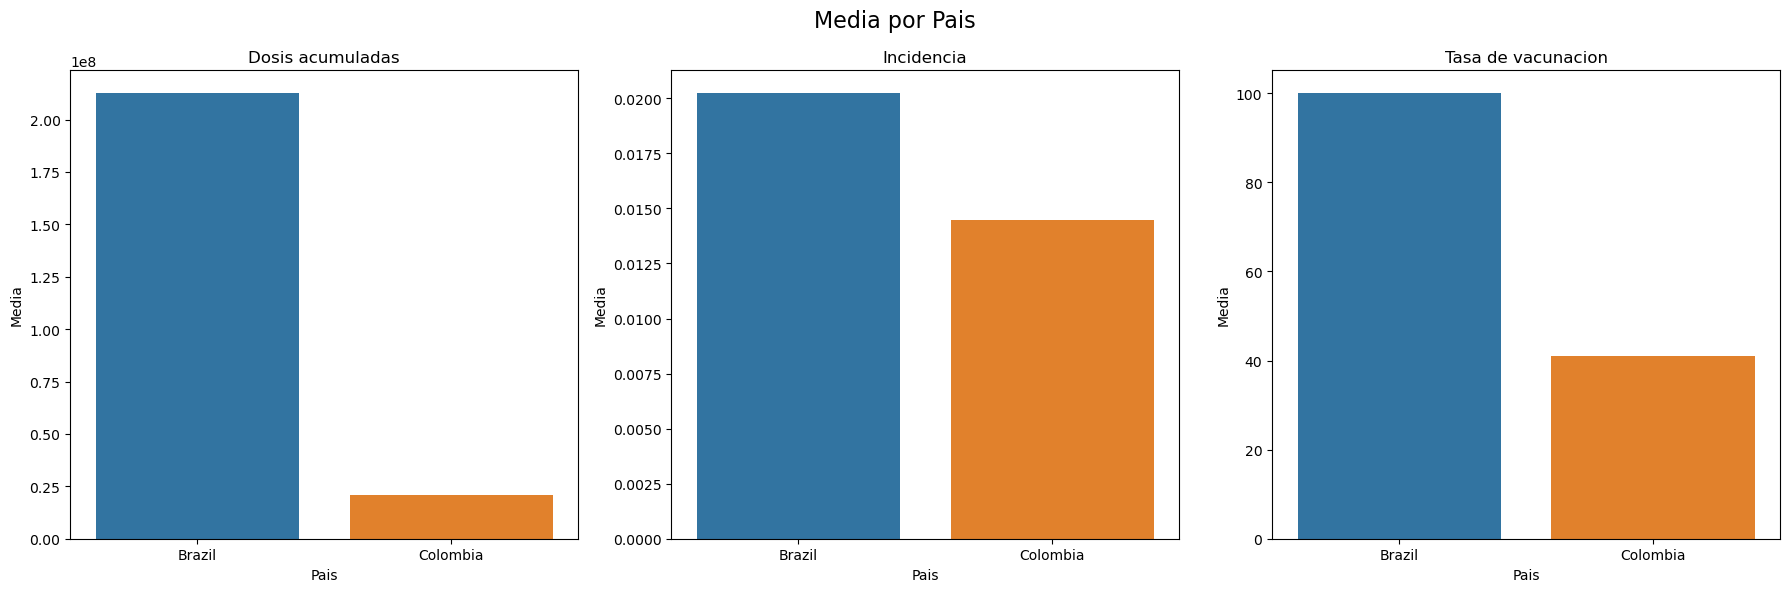

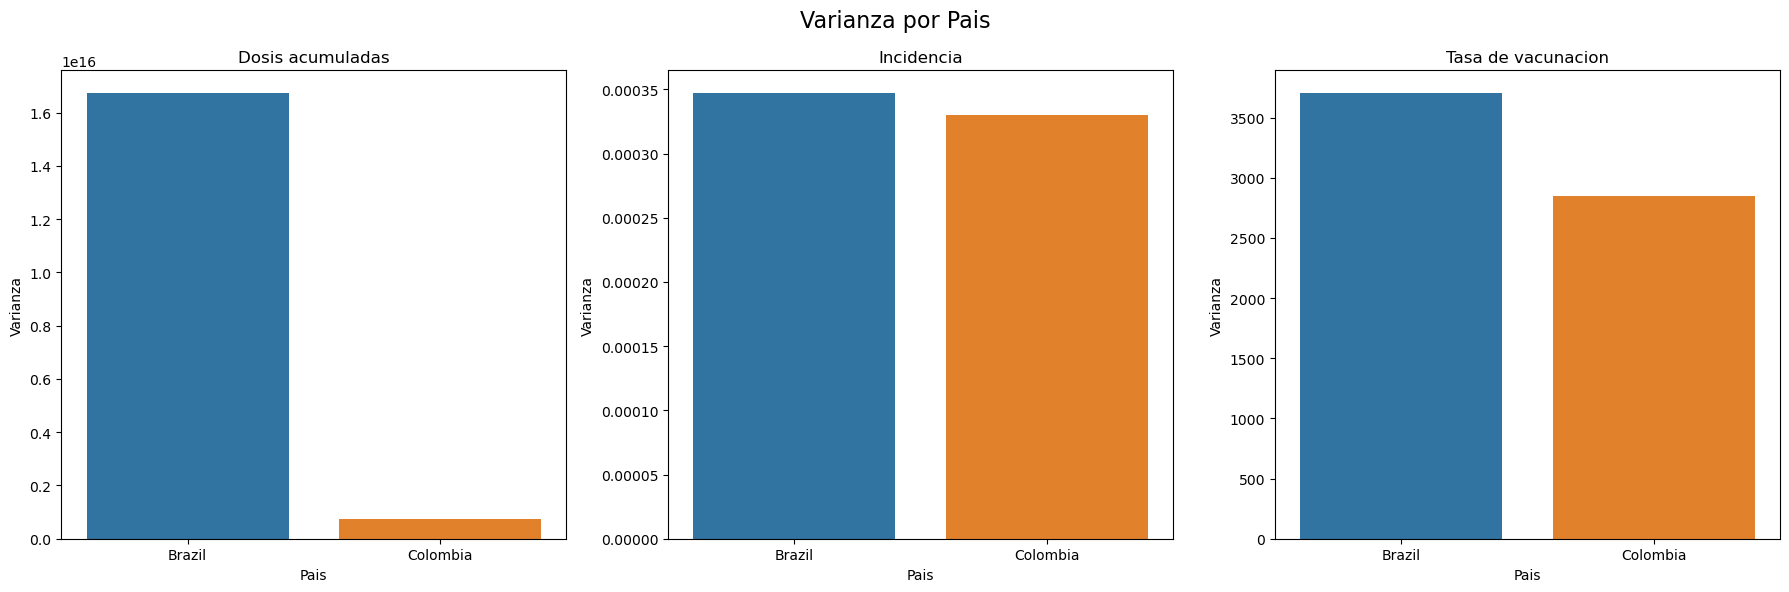

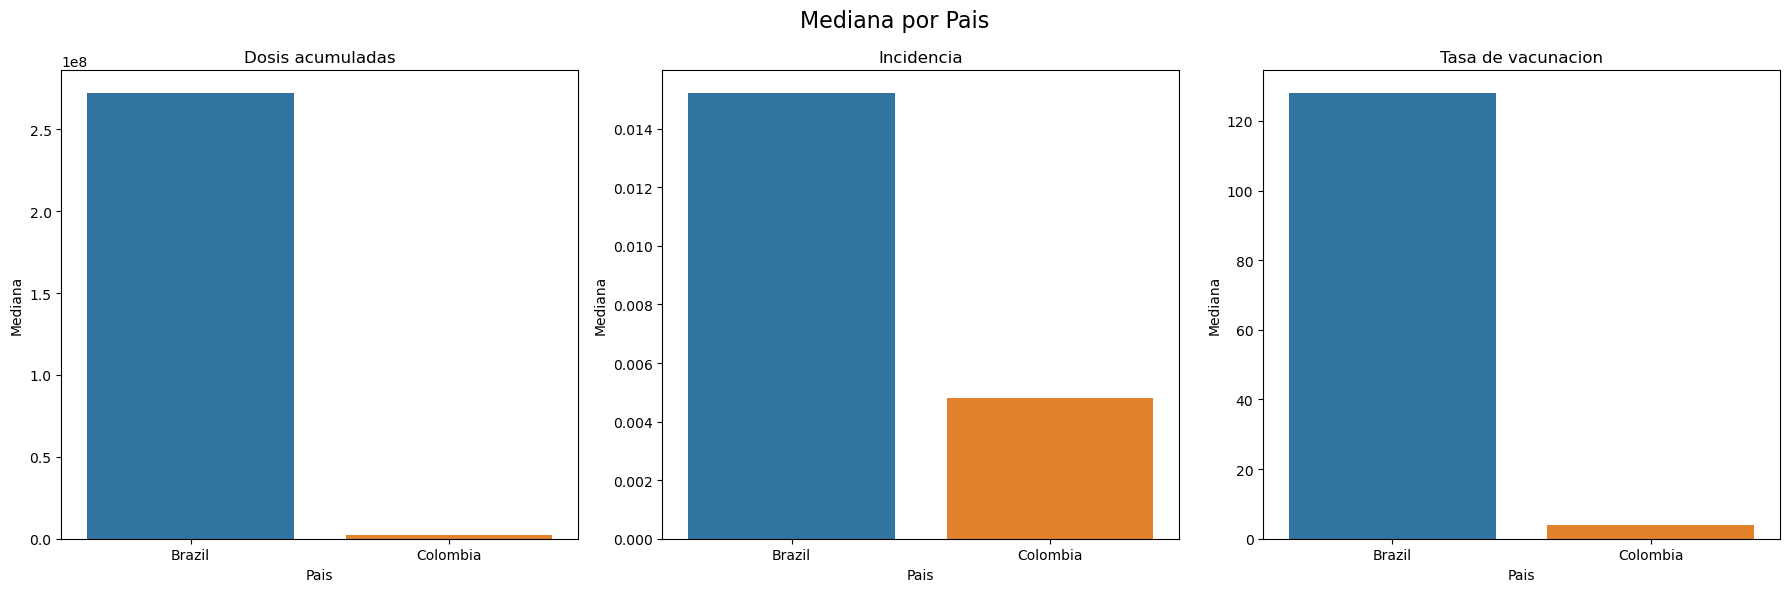

In [122]:
#Vamos a crear tres graficos en la misma figura horizontal para poder comparar entre paises con las diferentes variables 
# (ya que al mostrar juntas con las diferentes funciones, al tener diferentes escalas no se podian apreciar correctamente)


# Filtrar los datos por columna especifica
vacunas = resumen_df[resumen_df['Columna'] == 'cumulative_vaccine_doses_administered']
incidencia = resumen_df[resumen_df['Columna'] == 'incidencia']
tasa = resumen_df[resumen_df['Columna'] == 'tasa_vacunacion']

#____________________________________________________________________________________________________

# Crear la figura y los tres subgraficos para la MEDIA
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Grafico 1: vacunas
sns.barplot(data=vacunas, x='Pais', y='Media', ax=ax1)
ax1.set_title('Dosis acumuladas')
ax1.set_ylabel('Media')

# Gráfico 2: incidencia
sns.barplot(data=incidencia, x='Pais', y='Media', ax=ax2)
ax2.set_title('Incidencia')
ax2.set_ylabel('Media')

# Gráfico 3: tasa de vacunacion
sns.barplot(data=tasa, x='Pais', y='Media', ax=ax3)
ax3.set_title('Tasa de vacunacion')
ax3.set_ylabel('Media')

plt.suptitle('Media por Pais', fontsize=16)
plt.tight_layout()
plt.show()

#____________________________________________________________________________________________________

# Crear la figura y los tres subgraficos para la VARIANZA
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico 1: vacunas
sns.barplot(data=vacunas, x='Pais', y='Varianza', ax=ax1)
ax1.set_title('Dosis acumuladas')
ax1.set_ylabel('Varianza')

# Gráfico 2: incidencia
sns.barplot(data=incidencia, x='Pais', y='Varianza', ax=ax2)
ax2.set_title('Incidencia')
ax2.set_ylabel('Varianza')

# Gráfico 3: tasa de vacunacion
sns.barplot(data=tasa, x='Pais', y='Varianza', ax=ax3)
ax3.set_title('Tasa de vacunacion')
ax3.set_ylabel('Varianza')

plt.suptitle('Varianza por Pais', fontsize=16)
plt.tight_layout()
plt.show()

#____________________________________________________________________________________________________

# Crear la figura y los tres subgraficos para la MEDIANA
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico 1: vacunas
sns.barplot(data=vacunas, x='Pais', y='Mediana', ax=ax1)
ax1.set_title('Dosis acumuladas')
ax1.set_ylabel('Mediana')

# Gráfico 2: incidencia
sns.barplot(data=incidencia, x='Pais', y='Mediana', ax=ax2)
ax2.set_title('Incidencia')
ax2.set_ylabel('Mediana')

# Gráfico 3: tasa de vacunacion
sns.barplot(data=tasa, x='Pais', y='Mediana', ax=ax3)
ax3.set_title('Tasa de vacunacion')
ax3.set_ylabel('Mediana')

plt.suptitle('Mediana por Pais', fontsize=16)
plt.tight_layout()
plt.show()


En los graficos resultantes podemos ver lo siguiente:
1. Media: Dosis acumuladas mucho mas altas en Brasil aunque tambien una incidencia mas alta asi como la tasa de vacunacion.
2. Varianza: En las dosis acumuladas un valor mucho mas elevado en Brasil, la incidencia es casi igual para ambos paises y  la tasa de vacunacion un poco mas elevada en brasil.
3. Mediana: En Brasil es claramente mucho mas elevada las dosis acumuladas asi como la tasa de vacunacion, aunque tambien es superior en la incidencia.


Por lo tanto podemos observar que brasil tuvo una campaña mas intensa en ciertos periodos de tiempo (o que la carga de estos datos fue inconsistente), con bastante variabilidad a la hora de administrar las vacunas. Tambien tuvo una incidencia mas alta en la cantidad de casos detectados. Por lo tanto habria que analizar otras variables para poder saber que influyó en la suba de casos en Brasil

## Cuarto Avance

Creamos el archivo para poder impotarlo a Power BI

In [ ]:
#corregimos datos nulos en la columna de tasa_vacunacion_lag14
# 2. Reemplazar por la media
media = df_filtrado['tasa_vacunacion_lag14'].mean()
df_filtrado['tasa_vacunacion_lag14'].fillna(media, inplace=True)


Unnamed: 0 location_key       date country_code country_name  \
0         367           AR 2021-01-02           AR    Argentina   
1         368           AR 2021-01-03           AR    Argentina   
2         369           AR 2021-01-04           AR    Argentina   
3         370           AR 2021-01-05           AR    Argentina   
4         371           AR 2021-01-06           AR    Argentina   
5         372           AR 2021-01-07           AR    Argentina   
6         373           AR 2021-01-08           AR    Argentina   
7         374           AR 2021-01-09           AR    Argentina   
8         375           AR 2021-01-10           AR    Argentina   
9         376           AR 2021-01-11           AR    Argentina   

   new_confirmed  new_deceased  cumulative_confirmed  cumulative_deceased  \
0         7767.0         166.0             1670634.0              46688.0   
1         4934.0         157.0             1675568.0              46845.0   
2        13953.0         157.0             1689521.0              47002.0   
3        14085.0         160.0             1703606.0              47162.0   
4        14496.0         131.0             1718102.0              47293.0   
5        13722.0         160.0             1731824.0              47453.0   
6        13932.0         162.0             1745756.0              47615.0   
7         9959.0         158.0             1755715.0              47773.0   
8         5174.0         165.0             1760889.0              47938.0   
9        13076.0         170.0             1773965.0              48108.0   

   cumulative_vaccine_doses_administered  ...  area_urban_sq_km  \
0                                20334.0  ...           55032.0   
1                                20529.0  ...           55032.0   
2                                25164.0  ...           55032.0   
3                                29852.0  ...           55032.0   
4                                34162.0  ...           55032.0   
5                                42092.0  ...           55032.0   
6                                54090.0  ...           55032.0   
7                                58552.0  ...           55032.0   
8                                59043.0  ...           55032.0   
9                                67496.0  ...           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   
5            76.52                    147.086                       79.483   
6            76.52                    147.086                       79.483   
7            76.52                    147.086                       79.483   
8            76.52                    147.086                       79.483   
9            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            0.0   
1                      26.6                        15.8            0.0   
2                      26.6                        15.8            0.0   
3                      26.6                        15.8            0.0   
4                      26.6                        15.8            0.0   
5                      26.6                        15.8            0.0   
6                      26.6                        15.8            0.0   
7                      26.6                        15.8            0.0   
8                      26.6                        15.8            0.0   
9                      26.6                        15.8            0.0   

   cu

In [128]:
df_final_A2.to_csv('DatosFinalesFiltrados.csv', index = False)